# Investigating the Education Consultancy Business
**Shaun Chua** 
<br>**(DSI-13)**

---

# Table of Contents: <a id="top"></a>
[**1. Problem Statement**](#1)
<br> [**2. Importing Libraries**](#2)
<br> [**3. Importing Datasets**](#3)
<br> [**4. Data Cleaning**](#4)
<br> &emsp; [4.01 Data Cleaning: Column Names](#4.01)
<br> &emsp; [4.02 Data Cleaning: Dropping Unhelpful Features](#4.02)
<br> &emsp; [4.03 Data Cleaning: Dropping Rows](#4.03)
<br> &emsp; [4.04 Data Cleaning: `project_code`](#4.04)
<br> &emsp; [4.05 Data Cleaning: `qty`, `unit_price`, and `total`](#4.05)
<br> &emsp; [4.06 Data Cleaning: `entity` and `actual_entity`](#4.06)
<br> &emsp; [4.07 Data Cleaning: `consultant_name`](#4.07)
<br> &emsp; [4.08 Data Cleaning: `school` and `zone`](#4.08)
<br> &emsp; [4.09 Data Cleaning: `programme_name`](#4.09)
<br> &emsp; [4.10 Data Cleaning: `uom`](#4.10)
<br> &emsp; [4.11 Data Cleaning: `service_consultant`](#4.11)
<br> [**5. Preprocessing**](#5)
<br> &emsp; [5.1 Dummy Variables](#5.1)
<br> &emsp; [5.2 Defining Target and Features](#5.2)
<br> &emsp; [5.3 Train_Test_Split](#5.3)
<br> &emsp; [5.4 Scaling](#5.4)
<br> [**6. Modelling**](#6)
<br> &emsp; [**6.1 Modelling for Objective One**](#6.1)
<br> &emsp;&emsp;&emsp; [6.1.1 Linear Regression](#6.1.1)
<br> &emsp;&emsp;&emsp; [6.1.2 Regularisation with Lasso](#6.1.2)
<br> &emsp;&emsp;&emsp; [6.1.3 Regularisation with Ridge](#6.1.3)
<br> &emsp;&emsp;&emsp; [6.1.4 Regularisation with Elastic Net](#6.1.4)
<br> &emsp;&emsp;&emsp; [6.1.5 Summary of Linear Regression Metrics](#6.1.5)
<br> &emsp;&emsp;&emsp; [6.1.6 Visualising Features](#6.1.6)
<br> &emsp; [**6.2 Modelling for Objective Two**](#6.2)
<br> &emsp;&emsp;&emsp; [6.2.1 Linear Regression with Ridge Regularisation](#6.2.1)
<br> &emsp;&emsp;&emsp; [6.2.2 Decision Tree Regressor](#6.2.2)
<br> &emsp;&emsp;&emsp; [6.2.3 Random Forest Regressor](#6.2.3)
<br> &emsp;&emsp;&emsp; [6.2.4 Support Vector Regression](#6.2.4)
<br> &emsp;&emsp;&emsp; [6.2.5 AdaBoost (Decision Tree Regressor)](#6.2.5)
<br> &emsp;&emsp;&emsp; [6.2.6 AdaBoost (Random Forest Regressor)](#6.2.6)
<br> &emsp;&emsp;&emsp; [6.2.7 Gradient Boosting Regressor](#6.2.7)
<br> &emsp;&emsp;&emsp; [6.2.8 Extreme Gradient Boosting Regressor](#6.2.8)
<br> &emsp;&emsp;&emsp; [6.2.9 Summary of Regression Metrics](#6.2.9)
<br> &emsp; [6.3 Modelling for Objective Three](#6.3)
<br> [**7. Discussion**](#7)
<br> [**8. Limitations**](#8)
<br> [**8. Future Directions**](#9)

# 1. Problem Statement <a id="1"></a>

The inception of the Government Electronic Business Centre (GeBIZ) to standardise government tender and procurement has significantly reduced <a href="https://opentextbc.ca/principlesofeconomics/chapter/16-1-the-problem-of-imperfect-information-and-asymmetric-information/"> imperfect information and assymetric information</a>.

As a result, education consultancies face the daunting challenge of balancing several tenets of business development, such as: 
* Outreach to educational institutions 
* Pricing stragegies
* Business development

<a id="objectives"></a>
**The objectives of this project are twofold.** 

First, to investigate the business of such an education consultancy, identifying business units, consultants, and other relevant contributors to selling price of a programme. 

Second, to create a model that may assist in predicting a suitable selling price of educational programmes. 

Modelling will split into:
* [Modelling for Objective 1](#6.1)
* [Modelling for Objective 2](#6.2)

**This project will run the following models:**
<br> 1) Linear Regression with Regularisation (Ridge, Lasso, Elastic Net)
<br> 2) Decision Tree Regressor
<br> 3) Random Forest Regressor
<br> 4) Support Vector Regressor
<br> 5) Decision Tree Regressor with AdaBoost
<br> 6) Random Forest Regressor with AdaBoost
<br> 7) Gradient Boosting Regressor 
<br> 8) Extreme Gradient Boosting (XGBoost)

# 2. Importing Libraries <a id="2"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# RegEx
import re

import time

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split, KFold, cross_val_score, GridSearchCV 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

# xgboost
from xgboost.sklearn import XGBRegressor

#from sklearn.metrics import confusion_matrix, roc_auc_score

# Print styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Plot Style
plt.style.use('fivethirtyeight')


%matplotlib inline

In [2]:
# Starting timer for notebook

t0 = time.time()

# 3. Importing Datasets <a id="3"></a>

In [3]:
sales2017_df = pd.read_csv("./datasets/GA Capstone Dataset 1.csv")

In [4]:
sales2018_df = pd.read_csv("./datasets/GA Capstone Dataset 2.csv")

# 4. Data Cleaning and EDA <a id="4"></a>

##### Defining a function to preview dataframes

In [5]:
def preview(dataframe):
    dataframe_name = [x for x in globals() if globals()[x] is dataframe][0]
    print(f"{dataframe_name} has shape: {dataframe.shape}.")
    
    print("")
    print(f"{dataframe_name} has the following columns: {dataframe.columns}")
    
    print("\n")
    print(f"These are the top 5 rows of {dataframe_name}:")
    display(dataframe.head())

    print("\n")
    print(f"These are the bottom 5 rows of {dataframe_name}:")
    display(dataframe.tail())
    
    print("\n")
    nulls = dataframe.isnull().sum()
    total_nulls = dataframe.isnull().sum().sum()
    if total_nulls > 0:
        print(f"{dataframe_name} has a total {total_nulls} of nulls.")
        print("\n")
        print(f"The columns in {dataframe_name} with nulls are: {list(nulls[nulls>0].index)}") 
      
        print("\n")
        print(f"The variables with nulls in {dataframe_name} are:")
        display(nulls)

        print("\n")
        print(f"The top 5 variables in {dataframe_name} with the highest percentage of missing values are:")
        display(dataframe.isnull().mean().sort_values(ascending=False)[:5])

    else:
        print(f"{dataframe_name} does not contain nulls.")

In [6]:
# Previewing sales2017_df

preview(sales2017_df)

sales2017_df has shape: (3120, 36).

sales2017_df has the following columns: Index(['Project Code', 'Invoice Number', 'Invoice Date', 'QTY', 'UNIT PRICE',
       'TOTAL', 'Invoiced?\n[Y / N]', 'Invoice \nRemarks',
       'Reason for \nnot Invoicing', 'Entity', 'Actual Entity',
       'Consultant Name', 'SCHOOL', 'Zone', 'Programme \nName', 'UOM',
       'Projected \nAmount', 'January', 'February', 'March', 'March Hols',
       'April', 'May', 'June Hols', 'July', 'August', 'September', 'Sep Hols',
       'October', 'November', 'December', 'Payment \nReference',
       'Payment Date', 'Paid Amount', 'Outstanding\nAmount',
       'Service \nConsultant'],
      dtype='object')


These are the top 5 rows of sales2017_df:


,Project Code,Invoice Number,Invoice Date,QTY,UNIT PRICE,TOTAL,Invoiced?\n[Y / N],Invoice \nRemarks,Reason for \nnot Invoicing,Entity,...,September,Sep Hols,October,November,December,Payment \nReference,Payment Date,Paid Amount,Outstanding\nAmount,Service \nConsultant
0,VARI17001,INVVARI1702001,16-Feb-17,4.5,$150.00,675,NaN,4.5X$150=$675,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,5003179999,07.03.17,$675.00,$0.00,NaN
1,VARI17001,INVVARI1703001,6-Mar-17,18,$150.00,2700,NaN,18 x $150=$2700,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,5003191063,23.03.17,"$2,700.00",$0.00,NaN
2,VARI17001,INVVARI1705001,8-May-17,17.5,$150.00,2625,NaN,17.5 x 150=2625,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,5003220326,29.05.17,"$2,625.00",$0.00,NaN
3,VARI17001,INVVARI1706001,14-Jun-17,4.5,$150.00,675,NaN,NaN,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,5003240231,10.07.17,$675.00,$0.00,NaN
4,VARI17002,BILLED UNDER PASSIONISTA,NaN,48,$85.00,0,NaN,NaN,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN




These are the bottom 5 rows of sales2017_df:


,Project Code,Invoice Number,Invoice Date,QTY,UNIT PRICE,TOTAL,Invoiced?\n[Y / N],Invoice \nRemarks,Reason for \nnot Invoicing,Entity,...,September,Sep Hols,October,November,December,Payment \nReference,Payment Date,Paid Amount,Outstanding\nAmount,Service \nConsultant
3115,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN
3116,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN
3117,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN
3118,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN
3119,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN




sales2017_df has a total 93370 of nulls.


The columns in sales2017_df with nulls are: ['Project Code', 'Invoice Number', 'Invoice Date', 'QTY', 'UNIT PRICE', 'TOTAL', 'Invoiced?\n[Y / N]', 'Invoice \nRemarks', 'Reason for \nnot Invoicing', 'Entity', 'Actual Entity', 'Consultant Name', 'SCHOOL', 'Zone', 'Programme \nName', 'UOM', 'Projected \nAmount', 'January', 'February', 'March', 'March Hols', 'April', 'May', 'June Hols', 'July', 'August', 'September', 'Sep Hols', 'October', 'November', 'December', 'Payment \nReference', 'Payment Date', 'Paid Amount', 'Outstanding\nAmount', 'Service \nConsultant']


The variables with nulls in sales2017_df are:


Project Code                   901
Invoice Number                2793
Invoice Date                  2818
QTY                           2796
UNIT PRICE                    2795
TOTAL                           22
Invoiced?\n[Y / N]            2872
Invoice \nRemarks             3081
Reason for \nnot Invoicing    3099
Entity                         908
Actual Entity                 2782
Consultant Name               2774
SCHOOL                        2775
Zone                          2782
Programme \nName              2775
UOM                           2789
Projected \nAmount               7
January                       3078
February                      3067
March                         3060
March Hols                    3117
April                         3073
May                           3047
June Hols                     3108
July                          3059
August                        3068
September                     3081
Sep Hols                      3118
October             



The top 5 variables in sales2017_df with the highest percentage of missing values are:


Sep Hols                      0.999359
March Hols                    0.999038
December                      0.997756
June Hols                     0.996154
Reason for \nnot Invoicing    0.993269
dtype: float64

In [7]:
# Previewing sales2018_df

preview(sales2018_df)

sales2018_df has shape: (3798, 36).

sales2018_df has the following columns: Index(['Project Code', 'Invoice Number', 'Invoice Date', 'QTY', 'UNIT PRICE',
       'TOTAL', 'Invoiced?\n[Y / N]', 'Invoice \nRemarks',
       'Reason for \nnot Invoicing', 'Entity', 'Actual Entity',
       'Consultant Name', 'SCHOOL', 'Zone', 'Programme \nName', 'UOM',
       'Projected \nAmount', 'January', 'February', 'March', 'March Hols',
       'April', 'May', 'June Hols', 'July', 'August', 'September', 'Sep Hols',
       'October', 'November', 'December', 'Payment \nReference',
       'Payment Date', 'Paid Amount', 'Outstanding\nAmount',
       'Service \nConsultant'],
      dtype='object')


These are the top 5 rows of sales2018_df:


,Project Code,Invoice Number,Invoice Date,QTY,UNIT PRICE,TOTAL,Invoiced?\n[Y / N],Invoice \nRemarks,Reason for \nnot Invoicing,Entity,...,September,Sep Hols,October,November,December,Payment \nReference,Payment Date,Paid Amount,Outstanding\nAmount,Service \nConsultant
0,VARI18001,NaN,NaN,NaN,NaN,$0.00,NaN,NaN,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN
1,VARI18002,NaN,NaN,NaN,NaN,$0.00,NaN,NaN,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN
2,VARI18003,NaN,NaN,NaN,NaN,$0.00,NaN,NaN,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN
3,VARI18004,NaN,NaN,NaN,NaN,$0.00,NaN,NaN,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN
4,VARI18005,NaN,NaN,NaN,NaN,$0.00,NaN,NaN,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN




These are the bottom 5 rows of sales2018_df:


,Project Code,Invoice Number,Invoice Date,QTY,UNIT PRICE,TOTAL,Invoiced?\n[Y / N],Invoice \nRemarks,Reason for \nnot Invoicing,Entity,...,September,Sep Hols,October,November,December,Payment \nReference,Payment Date,Paid Amount,Outstanding\nAmount,Service \nConsultant
3793,TL18198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3794,TL18199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3795,TL18200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3796,VART18015,NaN,NaN,84.0,$108.00,"$9,072.00",NaN,NaN,NaN,ARTELIER PTE LTD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3797,TL18014,NaN,NaN,2.0,"$1,000.00",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




sales2018_df has a total 109756 of nulls.


The columns in sales2018_df with nulls are: ['Project Code', 'Invoice Number', 'Invoice Date', 'QTY', 'UNIT PRICE', 'TOTAL', 'Invoiced?\n[Y / N]', 'Invoice \nRemarks', 'Reason for \nnot Invoicing', 'Entity', 'Actual Entity', 'Consultant Name', 'SCHOOL', 'Zone', 'Programme \nName', 'UOM', 'Projected \nAmount', 'January', 'February', 'March', 'March Hols', 'April', 'May', 'June Hols', 'July', 'August', 'September', 'Sep Hols', 'October', 'November', 'December', 'Payment \nReference', 'Payment Date', 'Paid Amount', 'Outstanding\nAmount', 'Service \nConsultant']


The variables with nulls in sales2018_df are:


Project Code                     3
Invoice Number                3236
Invoice Date                  3247
QTY                           3238
UNIT PRICE                    3238
TOTAL                          111
Invoiced?\n[Y / N]            3471
Invoice \nRemarks             3741
Reason for \nnot Invoicing    3772
Entity                         190
Actual Entity                 3256
Consultant Name               3210
SCHOOL                        3222
Zone                          3239
Programme \nName              3224
UOM                           3276
Projected \nAmount             107
January                       3738
February                      3730
March                         3704
March Hols                    3795
April                         3738
May                           3708
June Hols                     3772
July                          3722
August                        3735
September                     3745
Sep Hols                      3793
October             



The top 5 variables in sales2018_df with the highest percentage of missing values are:


March Hols                    0.999210
Sep Hols                      0.998684
December                      0.998420
Reason for \nnot Invoicing    0.993154
June Hols                     0.993154
dtype: float64

In [8]:
# Combining sales2017_df and sales2018_df

combined_df = pd.concat([sales2017_df, sales2018_df], ignore_index=True)

In [9]:
# Previewing combined_df

preview(combined_df)

combined_df has shape: (6918, 36).

combined_df has the following columns: Index(['Project Code', 'Invoice Number', 'Invoice Date', 'QTY', 'UNIT PRICE',
       'TOTAL', 'Invoiced?\n[Y / N]', 'Invoice \nRemarks',
       'Reason for \nnot Invoicing', 'Entity', 'Actual Entity',
       'Consultant Name', 'SCHOOL', 'Zone', 'Programme \nName', 'UOM',
       'Projected \nAmount', 'January', 'February', 'March', 'March Hols',
       'April', 'May', 'June Hols', 'July', 'August', 'September', 'Sep Hols',
       'October', 'November', 'December', 'Payment \nReference',
       'Payment Date', 'Paid Amount', 'Outstanding\nAmount',
       'Service \nConsultant'],
      dtype='object')


These are the top 5 rows of combined_df:


,Project Code,Invoice Number,Invoice Date,QTY,UNIT PRICE,TOTAL,Invoiced?\n[Y / N],Invoice \nRemarks,Reason for \nnot Invoicing,Entity,...,September,Sep Hols,October,November,December,Payment \nReference,Payment Date,Paid Amount,Outstanding\nAmount,Service \nConsultant
0,VARI17001,INVVARI1702001,16-Feb-17,4.5,$150.00,675,NaN,4.5X$150=$675,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,5003179999,07.03.17,$675.00,$0.00,NaN
1,VARI17001,INVVARI1703001,6-Mar-17,18,$150.00,2700,NaN,18 x $150=$2700,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,5003191063,23.03.17,"$2,700.00",$0.00,NaN
2,VARI17001,INVVARI1705001,8-May-17,17.5,$150.00,2625,NaN,17.5 x 150=2625,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,5003220326,29.05.17,"$2,625.00",$0.00,NaN
3,VARI17001,INVVARI1706001,14-Jun-17,4.5,$150.00,675,NaN,NaN,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,5003240231,10.07.17,$675.00,$0.00,NaN
4,VARI17002,BILLED UNDER PASSIONISTA,NaN,48,$85.00,0,NaN,NaN,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN




These are the bottom 5 rows of combined_df:


,Project Code,Invoice Number,Invoice Date,QTY,UNIT PRICE,TOTAL,Invoiced?\n[Y / N],Invoice \nRemarks,Reason for \nnot Invoicing,Entity,...,September,Sep Hols,October,November,December,Payment \nReference,Payment Date,Paid Amount,Outstanding\nAmount,Service \nConsultant
6913,TL18198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6914,TL18199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6915,TL18200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6916,VART18015,NaN,NaN,84,$108.00,"$9,072.00",NaN,NaN,NaN,ARTELIER PTE LTD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6917,TL18014,NaN,NaN,2,"$1,000.00",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




combined_df has a total 203126 of nulls.


The columns in combined_df with nulls are: ['Project Code', 'Invoice Number', 'Invoice Date', 'QTY', 'UNIT PRICE', 'TOTAL', 'Invoiced?\n[Y / N]', 'Invoice \nRemarks', 'Reason for \nnot Invoicing', 'Entity', 'Actual Entity', 'Consultant Name', 'SCHOOL', 'Zone', 'Programme \nName', 'UOM', 'Projected \nAmount', 'January', 'February', 'March', 'March Hols', 'April', 'May', 'June Hols', 'July', 'August', 'September', 'Sep Hols', 'October', 'November', 'December', 'Payment \nReference', 'Payment Date', 'Paid Amount', 'Outstanding\nAmount', 'Service \nConsultant']


The variables with nulls in combined_df are:


Project Code                   904
Invoice Number                6029
Invoice Date                  6065
QTY                           6034
UNIT PRICE                    6033
TOTAL                          133
Invoiced?\n[Y / N]            6343
Invoice \nRemarks             6822
Reason for \nnot Invoicing    6871
Entity                        1098
Actual Entity                 6038
Consultant Name               5984
SCHOOL                        5997
Zone                          6021
Programme \nName              5999
UOM                           6065
Projected \nAmount             114
January                       6816
February                      6797
March                         6764
March Hols                    6912
April                         6811
May                           6755
June Hols                     6880
July                          6781
August                        6803
September                     6826
Sep Hols                      6911
October             



The top 5 variables in combined_df with the highest percentage of missing values are:


March Hols                    0.999133
Sep Hols                      0.998988
December                      0.998121
June Hols                     0.994507
Reason for \nnot Invoicing    0.993206
dtype: float64

In [10]:
# Checking dtypes of combined_df

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Project Code               6014 non-null   object
 1   Invoice Number             889 non-null    object
 2   Invoice Date               853 non-null    object
 3   QTY                        884 non-null    object
 4   UNIT PRICE                 885 non-null    object
 5   TOTAL                      6785 non-null   object
 6   Invoiced?
[Y / N]          575 non-null    object
 7   Invoice 
Remarks           96 non-null     object
 8   Reason for 
not Invoicing  47 non-null     object
 9   Entity                     5820 non-null   object
 10  Actual Entity              880 non-null    object
 11  Consultant Name            934 non-null    object
 12  SCHOOL                     921 non-null    object
 13  Zone                       897 non-null    object
 14  Programm

##### Observations:
* Columns names should be converted to snake case

* dtypes seem to be incorrect for some features

* There seems to be a lot of missing values. Before dropping anything, I will investigate each feature individually, and determine which features are likely to provide insight, and which features are less likely to be helpful. 

## 4.01 Data Cleaning: Column Names <a id="4.01"></a>

##### Defining a function to clean column names

In [11]:
def clean_column_names(df):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(" ","_")
    df.columns = df.columns.str.replace("-","_")
    df.columns = df.columns.str.replace("/","_")
    
    return df

In [12]:
# Applying clean_column_names to combined_df

clean_column_names(combined_df)

,project_code,invoice_number,invoice_date,qty,unit_price,total,invoiced?\n[y___n],invoice_\nremarks,reason_for_\nnot_invoicing,entity,...,september,sep_hols,october,november,december,payment_\nreference,payment_date,paid_amount,outstanding\namount,service_\nconsultant
0,VARI17001,INVVARI1702001,16-Feb-17,4.5,$150.00,675,NaN,4.5X$150=$675,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,5003179999,07.03.17,$675.00,$0.00,NaN
1,VARI17001,INVVARI1703001,6-Mar-17,18,$150.00,2700,NaN,18 x $150=$2700,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,5003191063,23.03.17,"$2,700.00",$0.00,NaN
2,VARI17001,INVVARI1705001,8-May-17,17.5,$150.00,2625,NaN,17.5 x 150=2625,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,5003220326,29.05.17,"$2,625.00",$0.00,NaN
3,VARI17001,INVVARI1706001,14-Jun-17,4.5,$150.00,675,NaN,NaN,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,5003240231,10.07.17,$675.00,$0.00,NaN
4,VARI17002,BILLED UNDER PASSIONISTA,NaN,48,$85.00,0,NaN,NaN,NaN,ARTELIER (INSTRUCTOR) PTE LTD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,TL18198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6914,TL18199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6915,TL18200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6916,VART18015,NaN,NaN,84,$108.00,"$9,072.00",NaN,NaN,NaN,ARTELIER PTE LTD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Checking columns names again

combined_df.columns

Index(['project_code', 'invoice_number', 'invoice_date', 'qty', 'unit_price',
       'total', 'invoiced?\n[y___n]', 'invoice_\nremarks',
       'reason_for_\nnot_invoicing', 'entity', 'actual_entity',
       'consultant_name', 'school', 'zone', 'programme_\nname', 'uom',
       'projected_\namount', 'january', 'february', 'march', 'march_hols',
       'april', 'may', 'june_hols', 'july', 'august', 'september', 'sep_hols',
       'october', 'november', 'december', 'payment_\nreference',
       'payment_date', 'paid_amount', 'outstanding\namount',
       'service_\nconsultant'],
      dtype='object')

##### Observations:
Most columns names have been cleaned, with the exception of:
* invoiced?\n[y___n]
* invoice_\nremarks
* reason_for_\nnot_invoicing
* programme_\nname
* projected_\namount
* payment_\nreference
* outstanding\namount
* service_\nconsultant

`\n` probably means that during data entry, a linebreak was present. I will manually clean these column names. 

In [14]:
# Cleaning remaining columns

combined_df = combined_df.rename(columns={"invoiced?\n[y___n]": "invoice_status",
                                          "invoice_\nremarks": "invoice_remarks",
                                          "reason_for_\nnot_invoicing": "reason_for_not_invoicing",
                                          "programme_\nname": "programme_name",
                                          "projected_\namount": "projected_amount",
                                          "payment_\nreference": "payment_reference",
                                          "outstanding\namount": "outstanding_amount",
                                          "service_\nconsultant": "service_consultant"}
                                )

In [15]:
# Checking combined_df column names again

combined_df.columns

Index(['project_code', 'invoice_number', 'invoice_date', 'qty', 'unit_price',
       'total', 'invoice_status', 'invoice_remarks',
       'reason_for_not_invoicing', 'entity', 'actual_entity',
       'consultant_name', 'school', 'zone', 'programme_name', 'uom',
       'projected_amount', 'january', 'february', 'march', 'march_hols',
       'april', 'may', 'june_hols', 'july', 'august', 'september', 'sep_hols',
       'october', 'november', 'december', 'payment_reference', 'payment_date',
       'paid_amount', 'outstanding_amount', 'service_consultant'],
      dtype='object')

In [16]:
combined_df.shape

(6918, 36)

In [17]:
# Taking a look at combined_df

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   project_code              6014 non-null   object
 1   invoice_number            889 non-null    object
 2   invoice_date              853 non-null    object
 3   qty                       884 non-null    object
 4   unit_price                885 non-null    object
 5   total                     6785 non-null   object
 6   invoice_status            575 non-null    object
 7   invoice_remarks           96 non-null     object
 8   reason_for_not_invoicing  47 non-null     object
 9   entity                    5820 non-null   object
 10  actual_entity             880 non-null    object
 11  consultant_name           934 non-null    object
 12  school                    921 non-null    object
 13  zone                      897 non-null    object
 14  programme_name          

##### Observation

Upon discussion with a company representative, out of the 36 features, it would appear that most of them are not helpful in achieving either of the [2 objectives](#objectives).

The features that are helpful are:
* project_code
* qty
* unit_price
* total
* entity
* actual_entity
* consultant_name
* school
* zone
* programme_name
* uom
* service_consultant

Some of these features will be used to create dummy variables. Nonetheless, I will still go through each column and explain why some features are irrelevant. 


## 4.02 Data Cleaning: Dropping Unhelpful Features <a id="4.02"></a>

`invoice_number`
* This feature is a way for the company to keep track of project sales. Dropping this because it is already captured in `project_code`.

`invoice_date`
* If invoice date consistently reflects when the programme was sold, then it would be useful. Based on the company rep, it is as good as random because payments come in unpredictably.  

`invoice_status`
* This just tells us whether the invoice was sent out or not, not very insightful.

`invoice_remarks`
* Conprises miscellaneous information about invoicing, which is often an overlap with other features, such as `total` and `invoice_date` which is not helpful to begin with. 

`reason_for_not_invoicing`
* More for the company to understand its consultants, does not help with any of the objectives. 

`project_amount`
* Almost always equal to `total`, hence dropping. 

**Month Features (january, february, march, march_hols, april, may, june_hols, july, august, september, sep_hols, october, november, december)**
* Tracks which month payment comes in, whether as a one-time payment or in batches. Not helpful for any of the objectives. More for company administration. 

`payment_reference` and `payment_date`
* Again, for company reference, not useful for either objectives

`paid_amount`and `outstanding_amount`
* Almost always equal to total, outstanding amounts are often absorbed by the company, or traded for in-kind services. Hence, dropping this.


In [18]:
# Removing unhelpful features from combined_df

combined_df = combined_df[["project_code",
                          "qty",
                          "unit_price",
                          "total",
                          "entity",
                          "actual_entity",
                          "consultant_name",
                          "school",
                          "zone",
                          "programme_name",
                          "uom",
                          "service_consultant"]]

In [19]:
combined_df.columns

Index(['project_code', 'qty', 'unit_price', 'total', 'entity', 'actual_entity',
       'consultant_name', 'school', 'zone', 'programme_name', 'uom',
       'service_consultant'],
      dtype='object')

In [20]:
combined_df.shape

(6918, 12)

## 4.03 Data Cleaning: Dropping Rows <a id="4.03"></a>

##### Observation:

Upon clarification with a company rep, out of the 12 selected features, `project_code` will always have a default value.

Due to company procedure, `actual_entity`, `uom`, and `service_consultant` are unfilled at times, but these rows are still valuable.

On rare occassion, `total` will also be empty, but can be calculated from `qty` and `unit_price`.

If rows contain more `NaNs` apart from the above columns, I will drop them because it will be difficult to impute values as the information I have does not provide me with handles to impute.

In [21]:
# Dropping rows with NaN for columns apart from those mentioned
# Selecting thresh=8, because 4 columns are permissible to have NaNs
# If other columns turn out to have NaNs, I will deal with them separately

combined_df.dropna(axis=0, thresh=8, inplace=True)

In [22]:
combined_df.shape

(919, 12)

In [23]:
combined_df.columns

Index(['project_code', 'qty', 'unit_price', 'total', 'entity', 'actual_entity',
       'consultant_name', 'school', 'zone', 'programme_name', 'uom',
       'service_consultant'],
      dtype='object')

## 4.04 Data Cleaning: `project_code` <a id="4.04"></a>

In [24]:
# Checking shape

combined_df.shape

(919, 12)

In [25]:
# Checking for NaNs

combined_df[["project_code"]].isnull().sum()

project_code    2
dtype: int64

In [26]:
# Dropping the 2 rows with NaNs, because there's no way I will know what the actual project code is

combined_df.dropna(subset=["project_code"], inplace=True)

In [27]:
# An alternative way, just take the null NaN rows
# https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan

#combined_df = combined_df[combined_df["project_code"].notna()]

In [28]:
# Checking shape after drop

combined_df.shape

(917, 12)

In [29]:
# Checking dtype

combined_df["project_code"].dtype

dtype('O')

In [30]:
# Checking for unique values for project_code

len(combined_df["project_code"].unique())

823

##### Observation:

Initially, I had wanted to include `project_code` as features after dummying them. However, 823 features with only 917 observations is not best practice for modelling. 

Therefore, I will have to do without `project_code`, and instead go with `entity` or `actual_entity` which captures just the business unit that sold the programme, instead of both the business unit and the project_code under it. 

In [31]:
# Dropping project_code

combined_df = combined_df.drop(columns=["project_code"])

In [32]:
# Checking that drop was successful

combined_df.columns

Index(['qty', 'unit_price', 'total', 'entity', 'actual_entity',
       'consultant_name', 'school', 'zone', 'programme_name', 'uom',
       'service_consultant'],
      dtype='object')

In [33]:
# Checking shape
combined_df.shape

(917, 11)

## 4.05 Data Cleaning: `qty`, `unit_price`, `total` <a id="4.05"></a>

In [34]:
combined_df.shape

(917, 11)

In [35]:
print(f"nulls for qty: {combined_df.qty.isnull().sum()}",
      "\n"
      f"nulls for unit_price: {combined_df.unit_price.isnull().sum()}",
      "\n"
      f"nulls for total: {combined_df.total.isnull().sum()}")

nulls for qty: 51 
nulls for unit_price: 50 
nulls for total: 15


In [36]:
# Dropping nulls

combined_df.dropna(subset=["total", "unit_price", "qty"], inplace=True)

In [37]:
# Checking if the drop was successful

print(f"nulls for qty: {combined_df.qty.isnull().sum()}",
      "\n"
      f"nulls for unit_price: {combined_df.unit_price.isnull().sum()}",
      "\n"
      f"nulls for total: {combined_df.total.isnull().sum()}")

nulls for qty: 0 
nulls for unit_price: 0 
nulls for total: 0


In [38]:
# Checking shape of combined_df 

combined_df.shape

(859, 11)

In [39]:
# Resetting index

combined_df = combined_df.reset_index(drop=True)

In [40]:
# Checking dtypes

print(f"dtype for qty: {combined_df.qty.dtype}",
      "\n"
      f"dtype for unit_price: {combined_df.unit_price.dtype}",
      "\n"
      f"dtype for total: {combined_df.total.dtype}")

dtype for qty: object 
dtype for unit_price: object 
dtype for total: object


In [41]:
# Converting qty to float dtype

combined_df["qty"] = combined_df["qty"].replace({"-" : "0"}, regex=True)

combined_df["qty"] = combined_df["qty"].astype(float)

In [42]:
# Converting unit_price to float dtype

combined_df["unit_price"] = combined_df["unit_price"].replace({"," : "", "\$": ""}, regex=True)

combined_df["unit_price"] = combined_df["unit_price"].astype(float)

In [43]:
# Converting total to float dtype

combined_df["total"] = combined_df["total"].replace({"," : "", "\$": ""}, regex=True)

combined_df["total"] = combined_df["total"].astype(float)

In [44]:
# Checking that dtypes were changed succesfully

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   qty                 859 non-null    float64
 1   unit_price          859 non-null    float64
 2   total               859 non-null    float64
 3   entity              858 non-null    object 
 4   actual_entity       806 non-null    object 
 5   consultant_name     859 non-null    object 
 6   school              857 non-null    object 
 7   zone                837 non-null    object 
 8   programme_name      849 non-null    object 
 9   uom                 795 non-null    object 
 10  service_consultant  115 non-null    object 
dtypes: float64(3), object(8)
memory usage: 73.9+ KB


In [45]:
# Multiplying qty and unit_price, to get total (some values for total were not filled in)

combined_df["total"] = combined_df["qty"] * combined_df["unit_price"]

combined_df["total"]

0       675.0
1      2700.0
2      2625.0
3       675.0
4      4080.0
        ...  
854    3000.0
855    3178.0
856    1600.0
857    3750.0
858    5060.0
Name: total, Length: 859, dtype: float64

In [46]:
# Dropping qty, so we do not give the model the answer

combined_df.drop(columns=["qty"], inplace=True)

In [47]:
# Resetting index

combined_df = combined_df.reset_index(drop=True)

combined_df

,unit_price,total,entity,actual_entity,consultant_name,school,zone,programme_name,uom,service_consultant
0,150.0,675.0,ARTELIER (INSTRUCTOR) PTE LTD,NaN,LINDEN LOKE,JUNYUAN PRI,EAST,Art Club CCA,PER HR,NaN
1,150.0,2700.0,ARTELIER (INSTRUCTOR) PTE LTD,NaN,LINDEN LOKE,JUNYUAN PRI,NaN,Art Club CCA,NaN,NaN
2,150.0,2625.0,ARTELIER (INSTRUCTOR) PTE LTD,NaN,LINDEN LOKE,JUNYUAN PRI,NaN,Art Club CCA,NaN,NaN
3,150.0,675.0,ARTELIER (INSTRUCTOR) PTE LTD,NaN,LINDEN LOKE,JUNYUAN PRI,NaN,Art Club CCA,NaN,NaN
4,85.0,4080.0,ARTELIER (INSTRUCTOR) PTE LTD,NaN,MARTIN LOCK,SEMBAWANG PR,NORTH,Ceramics,PER PAX,NaN
...,...,...,...,...,...,...,...,...,...,...
854,3000.0,3000.0,TRAVELEARN,TRAVELEARN,JOHNNY,Singbiz travel,NON MOE,Mandrain Leadership workshop,PACKAGE - PAX,NaN
855,3178.0,3178.0,TRAVELEARN,TRAVELEARN,JOHNNY,Singbiz Travel,NON MOE,Ochestra workshop,PACKAGE - HR,NaN
856,800.0,1600.0,TRAVELEARN,TRAVELEARN,JOHNNY,Singbiz travel,NON MOE,Drama and dance workshop,PACKAGE - HR,NaN
857,250.0,3750.0,TRAVELEARN,PASSIONISTA PTE LTD,MARTIN LOCK,Woodlands Ring Sec,NORTH,Hospitality,PER PAX,NaN


In [48]:
# Checking shape

combined_df.shape

(859, 10)

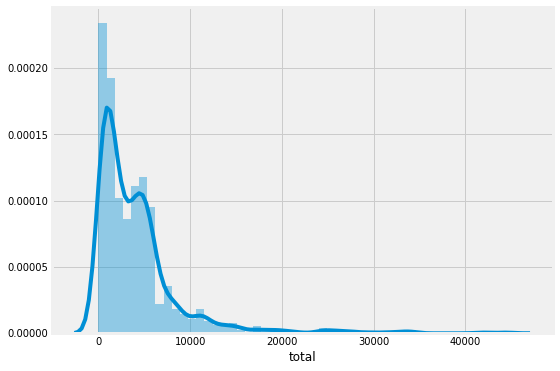

In [49]:
# Visualising the distribution of total

fig = plt.figure(figsize=(8,6), facecolor="white", edgecolor=None, frameon=True)
sns.distplot(combined_df["total"])

In [50]:
combined_df["total"].sort_values(ascending=True)

5          0.0
405        0.0
580      100.0
784      120.0
794      120.0
        ...   
365    32888.0
539    33840.0
195    34080.0
202    41900.0
283    44460.0
Name: total, Length: 859, dtype: float64

## 4.06 Data Cleaning: `entity` and `actual_entity` <a id="4.06"></a>

##### Note:

`entity` refers to the business unit that the programme was sold under.

`actual_entity` refers to the business unit that the revenue was credited to. 

This occurs because programmes are sometimes mixed, as per school requirements, and one business entity may not capture the full scope of the requested programme. 

For the purpose of analysis, we will only consider `actual_entity`, since that is where the revenue actually goes to.

But before that, I will proceed to clean these 2 features.

In [51]:
# Checking to see what business entities are in entity

combined_df["entity"].value_counts().sort_index()

A'CROSS ARTS PTE LTD                12
A'CROSS DANCE PTE LTD               14
A'CROSS DRAMA PTE LTD               12
A'CROSS MEDIA PTE LTD               43
A'CROSS MUSIC PTE LTD                3
A'CROSS SPORTS PTE LTD              38
ARTELIER (INSTRUCTOR) PTE LTD        5
ARTELIER PTE LTD                    92
DANCE ATELIER PTE LTD               21
DRAMAESTRO PTE LTD                   3
EPITOMEDIA (INSTRUCTOR) PTE LTD      1
EPITOMEDIA PTE LTD                  60
ETERNATIONAL EVENTS                  4
FENG HUA ZHAN PTE LTD               46
FUTURASIA                            1
LIFE CHAMPS PTE LTD                 26
MUSICON (INSTRUCTOR) PTE LTD        15
MUSICON PTE LTD                     43
OUTSTANDOR PTE LTD                   9
PASSIONISTA PTE LTD                125
SPORTS FIRST PTE LTD                23
STUDIO WU INTERNATIONAL PTE LTD     40
TRAVELEARN                          15
VIVARCH ENRICHMENT PTE LTD         207
Name: entity, dtype: int64

In [52]:
# Checking to see what business entities are in actual_entity

combined_df["actual_entity"].value_counts().sort_index()

A'CROSS ARTS PTE LTD                 2
A'CROSS DANCE PTE LTD               14
A'CROSS DRAMA PTE LTD               12
A'CROSS MEDIA PTE LTD               29
A'CROSS MUSIC PTE LTD                3
A'CROSS SPORTS PTE LTD              29
ARTELIER (INSTRUCTOR) PTE LTD        3
ARTELIER PTE LTD                   101
DANCE ATELIER PTE LTD               87
DRAMAESTRO PTE LTD                   3
EPITOMEDIA (INSTRUCTOR) PTE LTD      2
EPITOMEDIA PTE LTD                  69
FENG HUA ZHAN PTE LTD               47
FUTURASIA                            1
LIFE CHAMPS PTE LTD                 20
MUSICON (INSTRUCTOR) PTE LTD        18
MUSICON PTE LTD                     49
OUTSTANDOR PTE LTD                   6
PASSIONISTA PTE LTD                176
SPORTS FIRST PTE LTD                26
STUDIO WU INTERNATIONAL PTE LTD     41
STUDIO WU PTE LTD                    3
TRAVELEARN                           5
VIVARCH ENRICHMENT PTE LTD          60
Name: actual_entity, dtype: int64

##### Observation:

A'Cross is an affiliated partner, but not exactly part of the company. Therefore, for the purposes of conducting analysis for the company, I will be removing all A'Cross entries. 

In [53]:
# Dropping A'Cross entries

# https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p
# https://stackoverflow.com/questions/52297740/typeerror-bad-operand-type-for-unary-float

combined_df = combined_df[~combined_df["entity"].str.contains("A'CROSS", na=False)]
combined_df = combined_df[~combined_df["actual_entity"].str.contains("A'CROSS", na=False)]

In [54]:
# Checking to see if they were dropped entity

combined_df["entity"].value_counts().sort_index()

ARTELIER (INSTRUCTOR) PTE LTD        5
ARTELIER PTE LTD                    92
DANCE ATELIER PTE LTD               21
DRAMAESTRO PTE LTD                   3
EPITOMEDIA (INSTRUCTOR) PTE LTD      1
EPITOMEDIA PTE LTD                  60
ETERNATIONAL EVENTS                  4
FENG HUA ZHAN PTE LTD               46
FUTURASIA                            1
LIFE CHAMPS PTE LTD                 26
MUSICON (INSTRUCTOR) PTE LTD        15
MUSICON PTE LTD                     43
OUTSTANDOR PTE LTD                   9
PASSIONISTA PTE LTD                125
SPORTS FIRST PTE LTD                22
STUDIO WU INTERNATIONAL PTE LTD     40
TRAVELEARN                          15
VIVARCH ENRICHMENT PTE LTD         207
Name: entity, dtype: int64

In [55]:
# Checking to see if they were dropped for actual_entity

combined_df["actual_entity"].value_counts().sort_index()

ARTELIER (INSTRUCTOR) PTE LTD        3
ARTELIER PTE LTD                   101
DANCE ATELIER PTE LTD               87
DRAMAESTRO PTE LTD                   3
EPITOMEDIA (INSTRUCTOR) PTE LTD      2
EPITOMEDIA PTE LTD                  68
FENG HUA ZHAN PTE LTD               47
FUTURASIA                            1
LIFE CHAMPS PTE LTD                 20
MUSICON (INSTRUCTOR) PTE LTD        18
MUSICON PTE LTD                     49
OUTSTANDOR PTE LTD                   6
PASSIONISTA PTE LTD                172
SPORTS FIRST PTE LTD                25
STUDIO WU INTERNATIONAL PTE LTD     41
STUDIO WU PTE LTD                    3
TRAVELEARN                           5
VIVARCH ENRICHMENT PTE LTD          60
Name: actual_entity, dtype: int64

In [56]:
# Checking shape

combined_df.shape

(736, 10)

In [57]:
# Checking for nulls: 

print(f"nulls for entity: {combined_df.entity.isnull().sum()}",
      "\n"
      f"nulls for actual_entity: {combined_df.actual_entity.isnull().sum()}")

nulls for entity: 1 
nulls for actual_entity: 25


In [58]:
# Dropping nulls

combined_df.dropna(subset=["entity", "actual_entity"], inplace=True)

In [59]:
# Checking if drop was successful: 

print(f"nulls for entity: {combined_df.entity.isnull().sum()}",
      "\n"
      f"nulls for actual_entity: {combined_df.actual_entity.isnull().sum()}")

nulls for entity: 0 
nulls for actual_entity: 0


In [60]:
# Checking shape

combined_df.shape

(710, 10)

In [61]:
# Checking number of business units for entity and actual entity

print(f"Unique business units recorded in entity: {len(combined_df.entity.unique())}",
      "\n"
      f"Unique business units recorded in actual_entity: {len(combined_df.actual_entity.unique())}")

Unique business units recorded in entity: 17 
Unique business units recorded in actual_entity: 18


In [62]:
# Note to Self: When using f-strings, be sure to use different "" '' if needed. Yhe following will cause an error:

# Checking number of business units for entity and actual entity

# print(f"Unique business units recorded in entity: {len(combined_df["entity"].unique())}",
#       "\n"
#       f"Unique business units recorded in actual_entity: {len(combined_df["actual_entity"].unique())}")

##### Observation:

The discrepancy comes from two business units: Studio Wu Pte Ltd, and Studio Wu International Pte Ltd.

While different entities, they sell very similar programmes. For the purpose of analysis, I will still retain each entity as separate entities instead of combining them. 

I will now drop `entity`, because `actual_entity` captures the insight I am looking for.

In [63]:
# Dropping entity

combined_df.drop(columns=["entity"], inplace=True)

In [64]:
# Checking if drop was successful

combined_df.columns

Index(['unit_price', 'total', 'actual_entity', 'consultant_name', 'school',
       'zone', 'programme_name', 'uom', 'service_consultant'],
      dtype='object')

In [65]:
# Converting to lowercase and snake_case

combined_df["actual_entity"] = combined_df["actual_entity"].str.lower()
combined_df["actual_entity"] = combined_df["actual_entity"].str.replace(" ", "_")

combined_df["actual_entity"].value_counts()

passionista_pte_ltd                172
artelier_pte_ltd                   101
dance_atelier_pte_ltd               87
epitomedia_pte_ltd                  68
vivarch_enrichment_pte_ltd          60
musicon_pte_ltd                     49
feng_hua_zhan_pte_ltd               46
studio_wu_international_pte_ltd     41
sports_first_pte_ltd                25
life_champs_pte_ltd                 20
musicon_(instructor)_pte_ltd        18
outstandor_pte_ltd                   6
travelearn                           5
artelier_(instructor)_pte_ltd        3
studio_wu_pte_ltd                    3
dramaestro_pte_ltd                   3
epitomedia_(instructor)_pte_ltd      2
futurasia                            1
Name: actual_entity, dtype: int64

In [66]:
# Resetting Index

combined_df = combined_df.reset_index(drop=True)

In [67]:
# Checking shape

combined_df.shape

(710, 9)

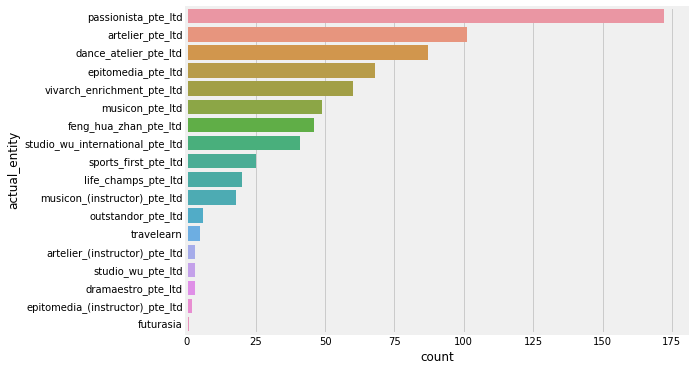

In [68]:
# Visualising actual_entity
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count

fig = plt.figure(figsize=(8,6))

sns.countplot(data=combined_df, 
              y="actual_entity", 
              order=combined_df["actual_entity"].value_counts().index)

##### Observations

It seems that Passionista Pte Ltd sells the most programmes, but we'll see if it is deemed to strongly impact `total` positively.

## 4.07 Data Cleaning: `consultant_name` <a id="4.07"></a>

In [69]:
# Taking a look at consultant_name

combined_df["consultant_name"].value_counts()

MARTIN LOCK        121
HARJINDER SINGH    121
RAMESH             111
NORAIN             101
IZWAN               40
SHAWN               38
POOJA               31
NORISMAN            28
LINDEN LOKE         26
FAIZAL              21
CHRISTINE           19
JOHNNY              17
KRISTEN             10
DYLAN HUANG          9
TERENCE              5
FAZMI                5
LOUIS                2
IAN CHIA             2
RUSYDI               1
Norain               1
NICHOLAS             1
Name: consultant_name, dtype: int64

In [70]:
# Checking for nulls: 

print(f"nulls for consultant_name: {combined_df.consultant_name.isnull().sum()}")

nulls for consultant_name: 0


In [71]:
# Converting to lowercase and snake_case

combined_df["consultant_name"] = combined_df["consultant_name"].str.lower()
combined_df["consultant_name"] = combined_df["consultant_name"].str.replace(" ", "_")

combined_df["consultant_name"].value_counts()

harjinder_singh    121
martin_lock        121
ramesh             111
norain             102
izwan               40
shawn               38
pooja               31
norisman            28
linden_loke         26
faizal              21
christine           19
johnny              17
kristen             10
dylan_huang          9
fazmi                5
terence              5
louis                2
ian_chia             2
rusydi               1
nicholas             1
Name: consultant_name, dtype: int64

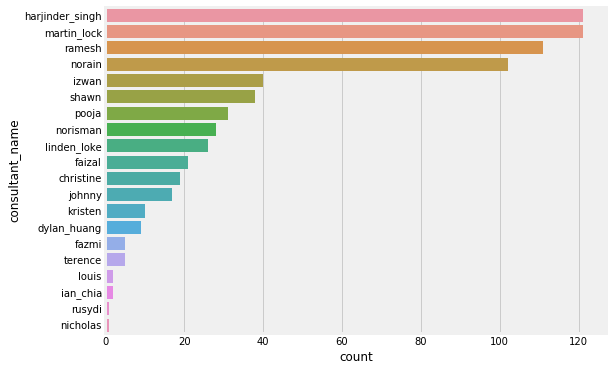

In [72]:
# Visualising consultant_name

fig = plt.figure(figsize=(8,6))

sns.countplot(data=combined_df, 
              y="consultant_name", 
              order=combined_df["consultant_name"].value_counts().index)

## 4.08 Data Cleaning: `school` and `zone` <a id="4.08"></a>

In [73]:
# Checking for unique values for school

len(combined_df["school"].unique())

346

In [74]:
# Checking for nulls in school

print(f"nulls in zone: {combined_df['school'].isnull().sum()}")

nulls in zone: 0


In [75]:
# Checking for unique values for zone

len(combined_df["zone"].unique())

7

In [76]:
# Checking for nulls in zone

print(f"nulls in zone: {combined_df['zone'].isnull().sum()}")

nulls in zone: 10


##### Observations

It may be wiser to go with `zone` instead of `school`, because 346 features for school with only 710 observations is not likely to work well for modelling. 

Eitherway, `zone` is a summation of schools located within a particular area of Singapore. In this sense, not all insights of `school` is lost. 

Before dropping `school`, I will use `school` to try and deduce appropriate imputation for nulls in `zone`. Since there are only 10 missing values, I will **manually** impute the appropriate zone by refering to the corresponding `school` in the same row, to determine which zone it is likely located in.

In [77]:
# Looking at the rows with nulls for zone
# https://intellipaat.com/community/27165/how-to-select-rows-with-nan-in-particular-column

combined_df[combined_df["zone"].isnull()]

,unit_price,total,actual_entity,consultant_name,school,zone,programme_name,uom,service_consultant
189,240.0,4560.0,passionista_pte_ltd,harjinder_singh,Queenstown Secondary,NaN,Culinary - Baking & Pastry,NaN,NaN
218,140.0,3500.0,studio_wu_international_pte_ltd,norain,DAZHONG PRIMARY SCHOOL,NaN,P1-P3 NAC DANCE,PER HR,NaN
351,3920.0,3920.0,artelier_pte_ltd,harjinder_singh,FIRST TOA PAYOH PRI,NaN,AMIS Paper Qulling and Metal Tooling,NaN,NaN
526,240.0,33840.0,passionista_pte_ltd,norisman,Swiss Cottage Sec,NaN,Hospitality EM,NaN,NaN
541,1026.0,1026.0,passionista_pte_ltd,norisman,Holy Innocence High,NaN,Magic/Illusion Program,NaN,NaN
555,250.0,5500.0,sports_first_pte_ltd,harjinder_singh,Queenstown Secondary School,NaN,QUEENSTOWN EM-F1 IN SCHOOLS,NaN,ISMAN
571,850.0,850.0,studio_wu_international_pte_ltd,norain,Zhenghua Primary School,NaN,Cluster Dance-syposium,NaN,NaN
572,1150.0,1150.0,studio_wu_international_pte_ltd,norain,Zhenghua Primary School,NaN,Deepavali Dance,NaN,NaN
579,2200.0,2200.0,studio_wu_international_pte_ltd,terence,tampines north primary,NaN,Dance Camp,NaN,NaN
580,3000.0,3000.0,studio_wu_international_pte_ltd,harjinder_singh,Tampines Sec,NaN,Percussive Movement/KPOP,NaN,NaN


In [78]:
# Imputing values for Zone
# Zone information: https://sis.moe.gov.sg/Medias/PDFs/School_Clusters_2014.pdf


combined_df["zone"].iloc[189] = combined_df["zone"].iloc[189] = "south"
combined_df["zone"].iloc[218] = combined_df["zone"].iloc[281] = "west"
combined_df["zone"].iloc[351] = combined_df["zone"].iloc[351] = "south"
combined_df["zone"].iloc[526] = combined_df["zone"].iloc[526] = "west"
combined_df["zone"].iloc[541] = combined_df["zone"].iloc[541] = "south"
combined_df["zone"].iloc[555] = combined_df["zone"].iloc[555] = "south"
combined_df["zone"].iloc[571] = combined_df["zone"].iloc[571] = "north"
combined_df["zone"].iloc[572] = combined_df["zone"].iloc[572] = "north"
combined_df["zone"].iloc[579] = combined_df["zone"].iloc[579] = "east"
combined_df["zone"].iloc[580] = combined_df["zone"].iloc[580] = "east"

C:\Users\Shaun\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [79]:
# Checking to see if imputation was successful

combined_df["zone"].isnull().sum()

0

In [80]:
# Converting to lowercase and snake_case

combined_df["zone"] = combined_df["zone"].str.lower()
combined_df["zone"] = combined_df["zone"].str.replace(" ", "_")

combined_df["zone"].value_counts()

north      231
south      195
west       157
east       119
non_moe      8
Name: zone, dtype: int64

In [81]:
# Dropping schools now that imputation is done

combined_df.drop(columns=["school"], inplace=True)

In [82]:
# Checking that drop was successful

combined_df.columns

Index(['unit_price', 'total', 'actual_entity', 'consultant_name', 'zone',
       'programme_name', 'uom', 'service_consultant'],
      dtype='object')

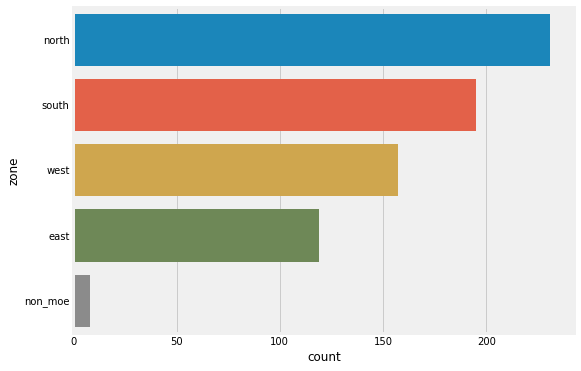

In [83]:
# Visualising zone

fig=plt.figure(figsize=(8,6))

sns.countplot(data=combined_df,
              y="zone",
              order=combined_df["zone"].value_counts().index)

## 4.09 Data Cleaning: `programme_name` <a id="4.09"></a>

In [84]:
combined_df["programme_name"].value_counts()

Junior Dance (Dance CCA) (continue from 2017)    11
TRACK & FIELDS                                    6
Culinary                                          6
EM                                                5
Digital Manga                                     5
                                                 ..
Batik                                             1
Foral Art                                         1
Culinary Artiste with Molecular Gastronomy        1
Healthcare                                        1
CULINARY EM                                       1
Name: programme_name, Length: 618, dtype: int64

##### Observation

Similar to before, 618 features with just 710 observations is not good practice for modelling. 

Will drop `programme_name`

In [85]:
# Dropping programme_name

combined_df.drop(columns=["programme_name"], inplace=True)

In [86]:
# Checking if drop was sucessful

combined_df.columns

Index(['unit_price', 'total', 'actual_entity', 'consultant_name', 'zone',
       'uom', 'service_consultant'],
      dtype='object')

## 4.10 Data Cleaning: `uom` <a id="4.10"></a>

In [87]:
combined_df["uom"].value_counts()

PER PAX          250
PER HR           216
PACKAGE - PAX    112
PACKAGE - HR      96
Per Pax            1
Name: uom, dtype: int64

In [88]:
# Checking for nulls in uom

print(f"nulls in uom:{combined_df['uom'].isnull().sum()}")

nulls in uom:35


In [89]:
combined_df[combined_df["uom"].isnull()]

,unit_price,total,actual_entity,consultant_name,zone,uom,service_consultant
98,1900.0,1900.0,feng_hua_zhan_pte_ltd,harjinder_singh,south,NaN,NaN
126,240.0,4080.0,passionista_pte_ltd,harjinder_singh,south,NaN,RAMESH
129,50.0,3800.0,life_champs_pte_ltd,harjinder_singh,south,NaN,RAMESH
152,2340.0,2340.0,musicon_pte_ltd,harjinder_singh,south,NaN,RAMESH
176,200.0,25200.0,passionista_pte_ltd,harjinder_singh,south,NaN,RAMESH
180,1200.0,1200.0,passionista_pte_ltd,pooja,east,NaN,NaN
188,240.0,34080.0,passionista_pte_ltd,harjinder_singh,west,NaN,RAMESH
189,240.0,4560.0,passionista_pte_ltd,harjinder_singh,south,NaN,NaN
287,770.0,770.0,vivarch_enrichment_pte_ltd,pooja,east,NaN,NaN
321,120.0,5040.0,artelier_pte_ltd,harjinder_singh,south,NaN,ISMAN


##### Observations

It seems that `uom` (Unit of Measure) is either per hour, or per pax. There are some overlaps in spelling, which I will replace. 

35 missing values are present, which I will have to drop, since the data does not provide me with handles for imputation. 

In [90]:
# Checking shape before drop

combined_df.shape

(710, 7)

In [91]:
# Dropping nulls for uom

combined_df.dropna(subset=["uom"], inplace=True)

In [92]:
# Checking if drop was successful

print(f"nulls in uom: {combined_df['uom'].isnull().sum()}")

nulls in uom: 0


In [93]:
# Checking shape after drop

combined_df.shape

(675, 7)

In [94]:
combined_df

,unit_price,total,actual_entity,consultant_name,zone,uom,service_consultant
0,108.0,0.0,artelier_pte_ltd,faizal,east,PER HR,NaN
1,115.0,4830.0,artelier_pte_ltd,norain,west,PER HR,NaN
2,48.8,7808.0,artelier_pte_ltd,faizal,east,PER PAX,NaN
3,130.0,26130.0,artelier_pte_ltd,linden_loke,east,PER PAX,NaN
4,100.0,9600.0,artelier_pte_ltd,norain,west,PER HR,NaN
...,...,...,...,...,...,...,...
705,3000.0,3000.0,travelearn,johnny,non_moe,PACKAGE - PAX,NaN
706,3178.0,3178.0,travelearn,johnny,non_moe,PACKAGE - HR,NaN
707,800.0,1600.0,travelearn,johnny,non_moe,PACKAGE - HR,NaN
708,250.0,3750.0,passionista_pte_ltd,martin_lock,north,PER PAX,NaN


In [95]:
# Converting to lowercase and snake_case

combined_df["uom"] = combined_df["uom"].str.lower()
combined_df["uom"] = combined_df["uom"].str.replace(" ", "_")

combined_df["uom"].value_counts()

per_pax          251
per_hr           216
package_-_pax    112
package_-_hr      96
Name: uom, dtype: int64

In [96]:
# # Standardising uom entries 

combined_df["uom"] = combined_df["uom"].str.replace("package_-_pax", "per_pax")
combined_df["uom"] = combined_df["uom"].str.replace("package_-_hr", "per_hr")

combined_df["uom"].value_counts()

per_pax    363
per_hr     312
Name: uom, dtype: int64

## 4.11 Data Cleaning: `service_consultant` <a id="4.11"></a>

In [97]:
# Checking for nulls in service_consultant

print(f"nulls in service_consultant: {combined_df['service_consultant'].isnull().sum()}")

nulls in service_consultant: 578


In [98]:
# Checking for unique values

combined_df["service_consultant"].unique()

array([nan, 'RAMESH', 'KRISTEN', 'ISMAN'], dtype=object)

##### Observations

Here, nulls do not imply that values are missing. It more likely implies that the project did not enlist the help of another consultant, called a **Service Consultant**. 

Thus, for nulls, I will impute `"no_service_consultant"` for verbosity. 

In [99]:
combined_df["service_consultant"].fillna("no_service_consultant", inplace=True)

In [100]:
# Checking for nulls in service_consultant after imputation

print(f"nulls in service_consultant: {combined_df['service_consultant'].isnull().sum()}")

nulls in service_consultant: 0


In [101]:
# Checking for unique values after imputation

combined_df["service_consultant"].unique()

array(['no_service_consultant', 'RAMESH', 'KRISTEN', 'ISMAN'],
      dtype=object)

In [102]:
# Applying lowercase to service_consultant

combined_df["service_consultant"] = combined_df["service_consultant"].str.lower()

combined_df["service_consultant"]

0      no_service_consultant
1      no_service_consultant
2      no_service_consultant
3      no_service_consultant
4      no_service_consultant
               ...          
705    no_service_consultant
706    no_service_consultant
707    no_service_consultant
708    no_service_consultant
709    no_service_consultant
Name: service_consultant, Length: 675, dtype: object

In [103]:
# Resetting index

combined_df.reset_index(drop=True)

,unit_price,total,actual_entity,consultant_name,zone,uom,service_consultant
0,108.0,0.0,artelier_pte_ltd,faizal,east,per_hr,no_service_consultant
1,115.0,4830.0,artelier_pte_ltd,norain,west,per_hr,no_service_consultant
2,48.8,7808.0,artelier_pte_ltd,faizal,east,per_pax,no_service_consultant
3,130.0,26130.0,artelier_pte_ltd,linden_loke,east,per_pax,no_service_consultant
4,100.0,9600.0,artelier_pte_ltd,norain,west,per_hr,no_service_consultant
...,...,...,...,...,...,...,...
670,3000.0,3000.0,travelearn,johnny,non_moe,per_pax,no_service_consultant
671,3178.0,3178.0,travelearn,johnny,non_moe,per_hr,no_service_consultant
672,800.0,1600.0,travelearn,johnny,non_moe,per_hr,no_service_consultant
673,250.0,3750.0,passionista_pte_ltd,martin_lock,north,per_pax,no_service_consultant


# 5. Preprocessing <a id="5"></a>

## 5.1 Dummy Variables <a id="5.1"></a>

In [104]:
# Using Pandas' get_dummies to encode nominal categorical variables

combined_df_final = pd.get_dummies(combined_df, columns = ["actual_entity",
                                                           "consultant_name",
                                                           "zone",
                                                           "uom",
                                                           "service_consultant"], drop_first=True)

combined_df_final

,unit_price,total,actual_entity_artelier_pte_ltd,actual_entity_dance_atelier_pte_ltd,actual_entity_dramaestro_pte_ltd,actual_entity_epitomedia_(instructor)_pte_ltd,actual_entity_epitomedia_pte_ltd,actual_entity_feng_hua_zhan_pte_ltd,actual_entity_life_champs_pte_ltd,actual_entity_musicon_(instructor)_pte_ltd,...,consultant_name_shawn,consultant_name_terence,zone_non_moe,zone_north,zone_south,zone_west,uom_per_pax,service_consultant_kristen,service_consultant_no_service_consultant,service_consultant_ramesh
0,108.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,115.0,4830.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,48.8,7808.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,130.0,26130.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,100.0,9600.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,3000.0,3000.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
706,3178.0,3178.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
707,800.0,1600.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
708,250.0,3750.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [105]:
# Saving finalised dataset

combined_df_final.to_csv("./datasets/combined_df_final.csv", index=False)

## 5.2 Defining Target and Features <a id="5.2"></a>

In [106]:
combined_df_final.columns

Index(['unit_price', 'total', 'actual_entity_artelier_pte_ltd',
       'actual_entity_dance_atelier_pte_ltd',
       'actual_entity_dramaestro_pte_ltd',
       'actual_entity_epitomedia_(instructor)_pte_ltd',
       'actual_entity_epitomedia_pte_ltd',
       'actual_entity_feng_hua_zhan_pte_ltd',
       'actual_entity_life_champs_pte_ltd',
       'actual_entity_musicon_(instructor)_pte_ltd',
       'actual_entity_musicon_pte_ltd', 'actual_entity_outstandor_pte_ltd',
       'actual_entity_passionista_pte_ltd',
       'actual_entity_sports_first_pte_ltd',
       'actual_entity_studio_wu_international_pte_ltd',
       'actual_entity_studio_wu_pte_ltd', 'actual_entity_travelearn',
       'actual_entity_vivarch_enrichment_pte_ltd',
       'consultant_name_dylan_huang', 'consultant_name_faizal',
       'consultant_name_fazmi', 'consultant_name_harjinder_singh',
       'consultant_name_ian_chia', 'consultant_name_izwan',
       'consultant_name_johnny', 'consultant_name_kristen',
       'cons

##### Note:
Features will first be split into the following groups:
* Business Units (actual_entity) 
* Consultants (consultant_name, service_consultant) 
* Zone 

Each group will separately be fed into the model to obtain coefficients. Afterwhich, **all** features will be fed into the model to gain an overall understanding of which features harmed/helped `total`. 

In [107]:
# Defining X and y for Business Units

features_entity = ["actual_entity_artelier_pte_ltd",
                   "actual_entity_dance_atelier_pte_ltd",
                   "actual_entity_dramaestro_pte_ltd",
                   "actual_entity_epitomedia_(instructor)_pte_ltd",
                   "actual_entity_epitomedia_pte_ltd",
                   "actual_entity_feng_hua_zhan_pte_ltd",
                   "actual_entity_life_champs_pte_ltd",
                   "actual_entity_musicon_(instructor)_pte_ltd",
                   "actual_entity_musicon_pte_ltd", 
                   "actual_entity_outstandor_pte_ltd",
                   "actual_entity_passionista_pte_ltd",
                   "actual_entity_sports_first_pte_ltd",
                   "actual_entity_studio_wu_international_pte_ltd",
                   "actual_entity_studio_wu_pte_ltd", 
                   "actual_entity_travelearn",
                   "actual_entity_vivarch_enrichment_pte_ltd"]


target_entity = ["total"]

X_entity = combined_df_final[features_entity]
y_entity = combined_df_final[target_entity]

In [108]:
X_entity

,actual_entity_artelier_pte_ltd,actual_entity_dance_atelier_pte_ltd,actual_entity_dramaestro_pte_ltd,actual_entity_epitomedia_(instructor)_pte_ltd,actual_entity_epitomedia_pte_ltd,actual_entity_feng_hua_zhan_pte_ltd,actual_entity_life_champs_pte_ltd,actual_entity_musicon_(instructor)_pte_ltd,actual_entity_musicon_pte_ltd,actual_entity_outstandor_pte_ltd,actual_entity_passionista_pte_ltd,actual_entity_sports_first_pte_ltd,actual_entity_studio_wu_international_pte_ltd,actual_entity_studio_wu_pte_ltd,actual_entity_travelearn,actual_entity_vivarch_enrichment_pte_ltd
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
708,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [109]:
# Defining X and y for Consultants

features_consultant = ["consultant_name_dylan_huang", 
                        "consultant_name_faizal",
                        "consultant_name_fazmi", 
                        "consultant_name_harjinder_singh",
                        "consultant_name_ian_chia", 
                        "consultant_name_izwan",
                        "consultant_name_johnny", 
                        "consultant_name_kristen",
                        "consultant_name_linden_loke", 
                        "consultant_name_louis",
                        "consultant_name_martin_lock", 
                        "consultant_name_nicholas",
                        "consultant_name_norain", 
                        "consultant_name_norisman",
                        "consultant_name_pooja", 
                        "consultant_name_ramesh",
                        "consultant_name_rusydi", 
                        "consultant_name_shawn",
                        "consultant_name_terence",
                        "service_consultant_kristen",
                        "service_consultant_no_service_consultant",
                        "service_consultant_ramesh"]


target_consultant = ["total"]

X_consultant = combined_df_final[features_consultant]
y_consultant = combined_df_final[target_consultant]

In [110]:
# Defining X and y for Zone

features_zone = ["zone_non_moe", 
                 "zone_north", 
                 "zone_south",
                 "zone_west"]


target_zone = ["total"]

X_zone = combined_df_final[features_zone]
y_zone = combined_df_final[target_zone]

In [111]:
# Defining X and y all features

features = [x for x in combined_df_final.columns if x not in ["total"]]
target = ["total"]

X = combined_df_final[features]
y = combined_df_final[target]

## 5.3 Train-Test-Split <a id="5.3"></a>

In [112]:
# train_test_split for Business Units

X_entity_train, X_entity_val, y_entity_train, y_entity_val = train_test_split(X_entity, y_entity, test_size=0.2, random_state=42)

In [113]:
# train_test_split for Consultants

X_consultant_train, X_consultant_val, y_consultant_train, y_consultant_val = train_test_split(X_consultant, y_consultant, test_size=0.2, random_state=42)

In [114]:
# train_test_split for Business Zones

X_zone_train, X_zone_val, y_zone_train, y_zone_val = train_test_split(X_zone, y_zone, test_size=0.2, random_state=42)

In [115]:
# train_test_split for all features

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.4 Scaling <a id="5.4"></a>

In [116]:
# Instantiating StandardScaler()
ss = StandardScaler()

In [117]:
# Scaling for Business Units

X_entity_train_sc = ss.fit_transform(X_entity_train)
X_entity_val_sc = ss.transform(X_entity_val)

In [118]:
# Scaling for Consultants

X_consultant_train_sc = ss.fit_transform(X_consultant_train)
X_consultant_val_sc = ss.transform(X_consultant_val)

In [119]:
# Scaling for Zone

X_zone_train_sc = ss.fit_transform(X_zone_train)
X_zone_val_sc = ss.transform(X_zone_val)

In [120]:
# Scaling for all features

X_train_sc = ss.fit_transform(X_train)
X_val_sc = ss.transform(X_val)

# 6. Modelling <a id="6"></a>

## 6.1 Modelling for [Objective One](#objectives) <a id="6.1"></a>

As a reminder, Objective One was to investigate which features helped/harmed `total`. 

I will discuss insights and inferences at the [Conclusions and Recommendations](#7.1) section.

### 6.1.1 Linear Regression <a id="6.1.1"></a>

In [121]:
# Instantiating Linear Regression Models 

lr_entity = LinearRegression()
lr_consultant = LinearRegression()
lr_zone = LinearRegression()
lr = LinearRegression()

In [122]:
# Fitting lr for Business Units

lr_entity.fit(X_entity_train_sc, y_entity_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
# Fitting lr for Consultants

lr_consultant.fit(X_consultant_train_sc, y_consultant_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
# Fitting lr for Zone

lr_zone.fit(X_zone_train_sc, y_zone_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
# Fitting lr for all features

lr.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
# Scoring on train and validation for business units

print(color.BOLD + "Business Unit Baseline Train R\u00b2 Score" + color.END, f": {lr_entity.score(X_entity_train_sc, y_entity_train)}",
      "\n" +
      color.BOLD + "Business Unit Baseline Validation R\u00b2 Score" + color.END, f": {lr_entity.score(X_entity_val_sc, y_entity_val)}",
      "\n" +
      color.BOLD + "Business Unit Baseline Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_entity_train, y_pred=lr_entity.predict(X_entity_train_sc))**0.5)}",
      "\n" +
      color.BOLD + "Business Unit Baseline Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_entity_val, y_pred=lr_entity.predict(X_entity_val_sc))**0.5)}")

Business Unit Baseline Train R² Score : 0.11947006868215315 
Business Unit Baseline Validation R² Score : 0.05110008689137413 
Business Unit Baseline Train RMSE Score : 4447.863006691556 
Business Unit Baseline Validation RMSE Score : 4945.580089660559


In [127]:
# Scoring on train and validation for consultants

print(color.BOLD + "Consultant Baseline Train R\u00b2 Score" + color.END, f": {lr_consultant.score(X_consultant_train_sc, y_consultant_train)}",
      "\n" +
      color.BOLD + "Consultant Baseline Validation R\u00b2 Score" + color.END, f": {lr_consultant.score(X_consultant_val_sc, y_consultant_val)}",
      "\n" +
      color.BOLD + "Consultant Baseline Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_consultant_train, y_pred=lr_consultant.predict(X_consultant_train_sc))**0.5)}",
      "\n" +
      color.BOLD + "Consultant Baseline Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_consultant_val, y_pred=lr_consultant.predict(X_consultant_val_sc))**0.5)}")

Consultant Baseline Train R² Score : 0.1321970489103349 
Consultant Baseline Validation R² Score : 0.13534619319871033 
Consultant Baseline Train RMSE Score : 4415.601806031485 
Consultant Baseline Validation RMSE Score : 4720.936564276449


In [128]:
# Scoring on train and validation for zone

print(color.BOLD + "Zone Baseline Train R\u00b2 Score" + color.END, f": {lr_zone.score(X_zone_train_sc, y_zone_train)}",
      "\n" +
      color.BOLD + "Zone Baseline Validation R\u00b2 Score" + color.END, f": {lr_zone.score(X_zone_val_sc, y_zone_val)}",
      "\n" +
      color.BOLD + "Zone Baseline Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_zone_train, y_pred=lr_zone.predict(X_zone_train_sc))**0.5)}",
      "\n" +
      color.BOLD + "Zone Baseline Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_zone_val, y_pred=lr_zone.predict(X_zone_val_sc))**0.5)}")

Zone Baseline Train R² Score : 0.05095817452636809 
Zone Baseline Validation R² Score : 0.0027282956989008737 
Zone Baseline Train RMSE Score : 4617.660689477009 
Zone Baseline Validation RMSE Score : 5070.068002141498


In [129]:
# Scoring on train and validation for all features

print(color.BOLD + "All Features Baseline Train R\u00b2 Score" + color.END, f": {lr.score(X_train_sc, y_train)}",
      "\n" +
      color.BOLD + "All Features Baseline Validation R\u00b2 Score" + color.END, f": {lr.score(X_val_sc, y_val)}",
      "\n" +
      color.BOLD + "All Features Baseline Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_train, y_pred=lr.predict(X_train_sc))**0.5)}",
      "\n" +
      color.BOLD + "All Features Baseline Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_val, y_pred=lr.predict(X_val_sc))**0.5)}")

All Features Baseline Train R² Score : 0.48908825652063276 
All Features Baseline Validation R² Score : 0.5626255246569314 
All Features Baseline Train RMSE Score : 3388.069289868743 
All Features Baseline Validation RMSE Score : 3357.637086040955


In [130]:
# Metrics for Linear Regression

metrics_df = pd.DataFrame(data=[lr.score(X_train_sc, y_train), 
                                lr.score(X_val_sc, y_val),
                                (mean_squared_error(y_true=y_train, y_pred=lr.predict(X_train_sc))**0.5),
                                (mean_squared_error(y_true=y_val, y_pred=lr.predict(X_val_sc))**0.5)],

                          index=["R\u00b2 Score (Train)", 
                                 "R\u00b2 Score (Validation)",
                                 "RMSE (Train)",
                                 "RMSE (Validation)"], 

                          columns=["Baseline (All Features)"])

metrics_df

,Baseline (All Features)
R² Score (Train),0.489088
R² Score (Validation),0.562626
RMSE (Train),3388.069290
RMSE (Validation),3357.637086


In [131]:
# Metrics for lr_entity

lr_entity_metrics_df = pd.DataFrame(data=[lr_entity.score(X_entity_train_sc, y_entity_train), 
                                          lr_entity.score(X_entity_val_sc, y_entity_val),
                                          (mean_squared_error(y_true=y_entity_train, y_pred=lr_entity.predict(X_entity_train_sc))**0.5),
                                          (mean_squared_error(y_true=y_entity_val, y_pred=lr_entity.predict(X_entity_val_sc))**0.5)],

                                    index=["R\u00b2 Score (Train)", 
                                           "R\u00b2 Score (Validation)",
                                           "RMSE (Train)",
                                           "RMSE (Validation)"], 

                                    columns=["Baseline (Entity)"])

metrics_df = metrics_df.join(lr_entity_metrics_df)
metrics_df

,Baseline (All Features),Baseline (Entity)
R² Score (Train),0.489088,0.119470
R² Score (Validation),0.562626,0.051100
RMSE (Train),3388.069290,4447.863007
RMSE (Validation),3357.637086,4945.580090


In [132]:
# Metrics for lr_consultant

lr_consultant_metrics_df = pd.DataFrame(data=[lr_consultant.score(X_consultant_train_sc, y_consultant_train), 
                                              lr_consultant.score(X_consultant_val_sc, y_consultant_val),
                                              (mean_squared_error(y_true=y_consultant_train, y_pred=lr_consultant.predict(X_consultant_train_sc))**0.5),
                                              (mean_squared_error(y_true=y_consultant_val, y_pred=lr_consultant.predict(X_consultant_val_sc))**0.5)],

                                        index=["R\u00b2 Score (Train)", 
                                               "R\u00b2 Score (Validation)",
                                               "RMSE (Train)",
                                               "RMSE (Validation)"], 

                                        columns=["Baseline (Consultant)"])

metrics_df = metrics_df.join(lr_consultant_metrics_df)
metrics_df

,Baseline (All Features),Baseline (Entity),Baseline (Consultant)
R² Score (Train),0.489088,0.119470,0.132197
R² Score (Validation),0.562626,0.051100,0.135346
RMSE (Train),3388.069290,4447.863007,4415.601806
RMSE (Validation),3357.637086,4945.580090,4720.936564


In [133]:
# Metrics for lr_zone

lr_zone_metrics_df = pd.DataFrame(data=[lr_zone.score(X_zone_train_sc, y_zone_train), 
                                        lr_zone.score(X_zone_val_sc, y_zone_val),
                                        (mean_squared_error(y_true=y_zone_train, y_pred=lr_zone.predict(X_zone_train_sc))**0.5),
                                        (mean_squared_error(y_true=y_zone_val, y_pred=lr_zone.predict(X_zone_val_sc))**0.5)],

                                  index=["R\u00b2 Score (Train)", 
                                         "R\u00b2 Score (Validation)",
                                         "RMSE (Train)",
                                         "RMSE (Validation)"], 

                                  columns=["Baseline (Zone)"])

metrics_df = metrics_df.join(lr_zone_metrics_df)
metrics_df

,Baseline (All Features),Baseline (Entity),Baseline (Consultant),Baseline (Zone)
R² Score (Train),0.489088,0.119470,0.132197,0.050958
R² Score (Validation),0.562626,0.051100,0.135346,0.002728
RMSE (Train),3388.069290,4447.863007,4415.601806,4617.660689
RMSE (Validation),3357.637086,4945.580090,4720.936564,5070.068002


### 6.1.2 Regularisation with Lasso <a id="6.1.2"></a>

In [134]:
# Instantiating LassoCV Models

lasso_entity = LassoCV()
lasso_consultant = LassoCV()
lasso_zone = LassoCV()
lasso = LassoCV()

In [135]:
# Fitting and getting optimum alpha for Business Units

lasso_entity.fit(X_entity_train_sc, y_entity_train)
print(f"Optimised alpha for lasso_entity: {lasso_entity.alpha_}")

Optimised alpha for lasso_entity: 110.75600812320387


C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [136]:
# Getting optimised Lasso for Business Units

optimised_lasso_entity = Lasso(alpha=lasso_entity.alpha_) 
optimised_lasso_entity.fit(X_entity_train_sc, y_entity_train)

Lasso(alpha=110.75600812320387, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [137]:
# Fitting and getting optimum alpha for Consultants

lasso_consultant.fit(X_consultant_train_sc, y_consultant_train)
print(f"Optimised alpha for lasso_consultant: {lasso_consultant.alpha_}")

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimised alpha for lasso_consultant: 1.6585838703283262


In [138]:
# Getting optimised Lasso for Consultants

optimised_lasso_consultant = Lasso(alpha=lasso_consultant.alpha_) 
optimised_lasso_consultant.fit(X_consultant_train_sc, y_consultant_train)

Lasso(alpha=1.6585838703283262, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [139]:
# Fitting and getting optimum alpha for Zones

lasso_zone.fit(X_zone_train_sc, y_zone_train)
print(f"Optimised alpha for lasso_zone: {lasso_zone.alpha_}")

Optimised alpha for lasso_zone: 57.75912900895026


C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [140]:
# Getting optimised Lasso for Zones

optimised_lasso_zone = Lasso(alpha=lasso_zone.alpha_) 
optimised_lasso_zone.fit(X_zone_train_sc, y_zone_train)

Lasso(alpha=57.75912900895026, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [141]:
# Fitting and getting optimum alpha for all features

lasso.fit(X_train_sc, y_train)
print(f"Optimised alpha for lasso: {lasso.alpha_}")

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimised alpha for lasso: 74.76829779872372


In [142]:
# Getting optimised Lasso for all features

optimised_lasso = Lasso(alpha=lasso.alpha_) 
optimised_lasso.fit(X_train_sc, y_train)

Lasso(alpha=74.76829779872372, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [143]:
# Scoring on train and validation for all features

print(color.BOLD + "All Features Lasso Train R\u00b2 Score" + color.END, f": {optimised_lasso.score(X_train_sc, y_train)}",
      "\n" +
      color.BOLD + "All Features Lasso Validation R\u00b2 Score" + color.END, f": {optimised_lasso.score(X_val_sc, y_val)}",
      "\n" +
      color.BOLD + "All Features Lasso Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_train, y_pred=optimised_lasso.predict(X_train_sc))**0.5)}",
      "\n" +
      color.BOLD + "All Features Lasso Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_val, y_pred=optimised_lasso.predict(X_val_sc))**0.5)}")

All Features Lasso Train R² Score : 0.4527507756996381 
All Features Lasso Validation R² Score : 0.5529874299947395 
All Features Lasso Train RMSE Score : 3506.484457989099 
All Features Lasso Validation RMSE Score : 3394.4303644878246


In [144]:
# Scoring on train and validation for Business Units

print(color.BOLD + "Business Units Lasso Train R\u00b2 Score" + color.END, f": {optimised_lasso_entity.score(X_entity_train_sc, y_entity_train)}",
      "\n" +
      color.BOLD + "Business Units Lasso Validation R\u00b2 Score" + color.END, f": {optimised_lasso_entity.score(X_entity_val_sc, y_entity_val)}",
      "\n" +
      color.BOLD + "Business Units Lasso Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_entity_train, y_pred=optimised_lasso_entity.predict(X_entity_train_sc))**0.5)}",
      "\n" +
      color.BOLD + "Business Units Lasso Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_entity_val, y_pred=optimised_lasso_entity.predict(X_entity_val_sc))**0.5)}")

Business Units Lasso Train R² Score : 0.11207844968936265 
Business Units Lasso Validation R² Score : 0.05642678465518014 
Business Units Lasso Train RMSE Score : 4466.492810855732 
Business Units Lasso Validation RMSE Score : 4931.679421913199


In [145]:
# Scoring on train and validation for Consultants

print(color.BOLD + "Consultants Lasso Train R\u00b2 Score" + color.END, f": {optimised_lasso_consultant.score(X_consultant_train_sc, y_consultant_train)}",
      "\n" +
      color.BOLD + "Consultants Lasso Validation R\u00b2 Score" + color.END, f": {optimised_lasso_consultant.score(X_consultant_val_sc, y_consultant_val)}",
      "\n" +
      color.BOLD + "Consultants Lasso Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_consultant_train, y_pred=optimised_lasso_consultant.predict(X_consultant_train_sc))**0.5)}",
      "\n" +
      color.BOLD + "Consultants Lasso Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_consultant_val, y_pred=optimised_lasso_consultant.predict(X_consultant_val_sc))**0.5)}")

Consultants Lasso Train R² Score : 0.13212955051889286 
Consultants Lasso Validation R² Score : 0.13568702367768015 
Consultants Lasso Train RMSE Score : 4415.7735271713145 
Consultants Lasso Validation RMSE Score : 4720.006019790134


In [146]:
# Scoring on train and validation for Zone

print(color.BOLD + "Zone Lasso Train R\u00b2 Score" + color.END, f": {optimised_lasso_zone.score(X_zone_train_sc, y_zone_train)}",
      "\n" +
      color.BOLD + "Zone Lasso Validation R\u00b2 Score" + color.END, f": {optimised_lasso_zone.score(X_zone_val_sc, y_zone_val)}",
      "\n" +
      color.BOLD + "Zone Lasso Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_zone_train, y_pred=optimised_lasso_zone.predict(X_zone_train_sc))**0.5)}",
      "\n" +
      color.BOLD + "Zone Lasso Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_zone_val, y_pred=optimised_lasso_zone.predict(X_zone_val_sc))**0.5)}")

Zone Lasso Train R² Score : 0.05012291785363099 
Zone Lasso Validation R² Score : 0.010509851529689418 
Zone Lasso Train RMSE Score : 4619.692256235487 
Zone Lasso Validation RMSE Score : 5050.248789271483


In [147]:
# Metrics for Optimised Lasso Regularisation (All Features)

optimised_lasso_metrics_df = pd.DataFrame(data=[optimised_lasso.score(X_train_sc, y_train), 
                                                optimised_lasso.score(X_val_sc, y_val),
                                                (mean_squared_error(y_true=y_train, y_pred=optimised_lasso.predict(X_train_sc))**0.5),
                                                (mean_squared_error(y_true=y_val, y_pred=optimised_lasso.predict(X_val_sc))**0.5)],

                                          index=["R\u00b2 Score (Train)", 
                                                 "R\u00b2 Score (Validation)",
                                                 "RMSE (Train)",
                                                 "RMSE (Validation)"], 

                                          columns=["Lasso (All Features)"])

metrics_df = metrics_df.join(optimised_lasso_metrics_df)
metrics_df

,Baseline (All Features),Baseline (Entity),Baseline (Consultant),Baseline (Zone),Lasso (All Features)
R² Score (Train),0.489088,0.119470,0.132197,0.050958,0.452751
R² Score (Validation),0.562626,0.051100,0.135346,0.002728,0.552987
RMSE (Train),3388.069290,4447.863007,4415.601806,4617.660689,3506.484458
RMSE (Validation),3357.637086,4945.580090,4720.936564,5070.068002,3394.430364


In [148]:
# Metrics for Optimised Lasso Regularisation (Business Units)

optimised_lasso_entity_metrics_df = pd.DataFrame(data=[optimised_lasso_entity.score(X_entity_train_sc, y_entity_train), 
                                                       optimised_lasso_entity.score(X_entity_val_sc, y_entity_val),
                                                       (mean_squared_error(y_true=y_entity_train, y_pred=optimised_lasso_entity.predict(X_entity_train_sc))**0.5),
                                                       (mean_squared_error(y_true=y_entity_val, y_pred=optimised_lasso_entity.predict(X_entity_val_sc))**0.5)],

                                                 index=["R\u00b2 Score (Train)", 
                                                        "R\u00b2 Score (Validation)",
                                                        "RMSE (Train)",
                                                        "RMSE (Validation)"], 

                                                 columns=["Lasso (Entity)"])

metrics_df = metrics_df.join(optimised_lasso_entity_metrics_df)
metrics_df

,Baseline (All Features),Baseline (Entity),Baseline (Consultant),Baseline (Zone),Lasso (All Features),Lasso (Entity)
R² Score (Train),0.489088,0.119470,0.132197,0.050958,0.452751,0.112078
R² Score (Validation),0.562626,0.051100,0.135346,0.002728,0.552987,0.056427
RMSE (Train),3388.069290,4447.863007,4415.601806,4617.660689,3506.484458,4466.492811
RMSE (Validation),3357.637086,4945.580090,4720.936564,5070.068002,3394.430364,4931.679422


In [149]:
# Metrics for Optimised Lasso Regularisation (Consultants)

optimised_lasso_consultant_metrics_df = pd.DataFrame(data=[optimised_lasso_consultant.score(X_consultant_train_sc, y_consultant_train), 
                                                           optimised_lasso_consultant.score(X_consultant_val_sc, y_consultant_val),
                                                           (mean_squared_error(y_true=y_consultant_train, y_pred=optimised_lasso_consultant.predict(X_consultant_train_sc))**0.5),
                                                           (mean_squared_error(y_true=y_consultant_val, y_pred=optimised_lasso_consultant.predict(X_consultant_val_sc))**0.5)],

                                                     index=["R\u00b2 Score (Train)", 
                                                            "R\u00b2 Score (Validation)",
                                                            "RMSE (Train)",
                                                            "RMSE (Validation)"], 

                                                     columns=["Lasso (Consultant)"])

metrics_df = metrics_df.join(optimised_lasso_consultant_metrics_df)
metrics_df

,Baseline (All Features),Baseline (Entity),Baseline (Consultant),Baseline (Zone),Lasso (All Features),Lasso (Entity),Lasso (Consultant)
R² Score (Train),0.489088,0.119470,0.132197,0.050958,0.452751,0.112078,0.132130
R² Score (Validation),0.562626,0.051100,0.135346,0.002728,0.552987,0.056427,0.135687
RMSE (Train),3388.069290,4447.863007,4415.601806,4617.660689,3506.484458,4466.492811,4415.773527
RMSE (Validation),3357.637086,4945.580090,4720.936564,5070.068002,3394.430364,4931.679422,4720.006020


In [150]:
# Metrics for Optimised Lasso Regularisation (Zone)

optimised_lasso_zone_metrics_df = pd.DataFrame(data=[optimised_lasso_zone.score(X_zone_train_sc, y_zone_train), 
                                                     optimised_lasso_zone.score(X_zone_val_sc, y_zone_val),
                                                     (mean_squared_error(y_true=y_zone_train, y_pred=optimised_lasso_zone.predict(X_zone_train_sc))**0.5),
                                                     (mean_squared_error(y_true=y_zone_val, y_pred=optimised_lasso_zone.predict(X_zone_val_sc))**0.5)],

                                               index=["R\u00b2 Score (Train)", 
                                                      "R\u00b2 Score (Validation)",
                                                      "RMSE (Train)",
                                                      "RMSE (Validation)"], 

                                               columns=["Lasso (Zone)"])

metrics_df = metrics_df.join(optimised_lasso_zone_metrics_df)
metrics_df

,Baseline (All Features),Baseline (Entity),Baseline (Consultant),Baseline (Zone),Lasso (All Features),Lasso (Entity),Lasso (Consultant),Lasso (Zone)
R² Score (Train),0.489088,0.119470,0.132197,0.050958,0.452751,0.112078,0.132130,0.050123
R² Score (Validation),0.562626,0.051100,0.135346,0.002728,0.552987,0.056427,0.135687,0.010510
RMSE (Train),3388.069290,4447.863007,4415.601806,4617.660689,3506.484458,4466.492811,4415.773527,4619.692256
RMSE (Validation),3357.637086,4945.580090,4720.936564,5070.068002,3394.430364,4931.679422,4720.006020,5050.248789


### 6.1.3 Regularisation with Ridge <a id="6.1.3"></a>

In [151]:
# Instantiating RidgeCV Models

ridge_entity = RidgeCV()
ridge_consultant = RidgeCV()
ridge_zone = RidgeCV()
ridge = RidgeCV()

In [152]:
# Fitting and getting optimum alpha for Business Units

ridge_entity.fit(X_entity_train_sc, y_entity_train)
print(f"Optimised alpha for ridge_entity: {ridge_entity.alpha_}")

Optimised alpha for ridge_entity: 10.0


In [153]:
# Getting optimised Ridge for Business Units

optimised_ridge_entity = Ridge(alpha=ridge_entity.alpha_) 
optimised_ridge_entity.fit(X_entity_train_sc, y_entity_train)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [154]:
# Fitting and getting optimum alpha for Consultants

ridge_consultant.fit(X_consultant_train_sc, y_consultant_train)
print(f"Optimised alpha for ridge_consultant: {ridge_consultant.alpha_}")

Optimised alpha for ridge_consultant: 1.0


In [155]:
# Getting optimised Ridge for Consultants

optimised_ridge_consultant = Ridge(alpha=ridge_consultant.alpha_) 
optimised_ridge_consultant.fit(X_consultant_train_sc, y_consultant_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [156]:
# Fitting and getting optimum alpha for Zones

ridge_zone.fit(X_zone_train_sc, y_zone_train)
print(f"Optimised alpha for ridge_zone: {ridge_zone.alpha_}")

Optimised alpha for ridge_zone: 10.0


In [157]:
# Getting optimised Ridge for Zones

optimised_ridge_zone = Ridge(alpha=ridge_zone.alpha_) 
optimised_ridge_zone.fit(X_zone_train_sc, y_zone_train)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [158]:
# Fitting and getting optimum alpha for all features

ridge.fit(X_train_sc, y_train)
print(f"Optimised alpha for ridge: {ridge.alpha_}")

Optimised alpha for ridge: 10.0


In [159]:
# Getting optimised Ridge for all features

optimised_ridge = Ridge(alpha=ridge.alpha_) 
optimised_ridge.fit(X_train_sc, y_train)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [160]:
# Scoring on train and validation for all features

print(color.BOLD + "All Features Ridge Train R\u00b2 Score" + color.END, f": {optimised_ridge.score(X_train_sc, y_train)}",
      "\n" +
      color.BOLD + "All Features Ridge Validation R\u00b2 Score" + color.END, f": {optimised_ridge.score(X_val_sc, y_val)}",
      "\n" +
      color.BOLD + "All Features Ridge Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_train, y_pred=optimised_ridge.predict(X_train_sc))**0.5)}",
      "\n" +
      color.BOLD + "All Features Ridge Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_val, y_pred=optimised_ridge.predict(X_val_sc))**0.5)}")

All Features Ridge Train R² Score : 0.4807804161957795 
All Features Ridge Validation R² Score : 0.5636073228964142 
All Features Ridge Train RMSE Score : 3415.5045901322283 
All Features Ridge Validation RMSE Score : 3353.866433641559


In [161]:
# Scoring on train and validation for Business Units

print(color.BOLD + "Business Units Ridge Train R\u00b2 Score" + color.END, f": {optimised_ridge_entity.score(X_entity_train_sc, y_entity_train)}",
      "\n" +
      color.BOLD + "Business Units Ridge Validation R\u00b2 Score" + color.END, f": {optimised_ridge_entity.score(X_entity_val_sc, y_entity_val)}",
      "\n" +
      color.BOLD + "Business Units Ridge Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_entity_train, y_pred=optimised_ridge_entity.predict(X_entity_train_sc))**0.5)}",
      "\n" +
      color.BOLD + "Business Units Ridge Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_entity_val, y_pred=optimised_ridge_entity.predict(X_entity_val_sc))**0.5)}")

Business Units Ridge Train R² Score : 0.11928234364828982 
Business Units Ridge Validation R² Score : 0.050538644089238915 
Business Units Ridge Train RMSE Score : 4448.3371136499645 
Business Units Ridge Validation RMSE Score : 4947.042967728581


In [162]:
# Scoring on train and validation for Consultants

print(color.BOLD + "Consultants Ridge Train R\u00b2 Score" + color.END, f": {optimised_ridge_consultant.score(X_consultant_train_sc, y_consultant_train)}",
      "\n" +
      color.BOLD + "Consultants Ridge Validation R\u00b2 Score" + color.END, f": {optimised_ridge_consultant.score(X_consultant_val_sc, y_consultant_val)}",
      "\n" +
      color.BOLD + "Consultants Ridge Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_consultant_train, y_pred=optimised_ridge_consultant.predict(X_consultant_train_sc))**0.5)}",
      "\n" +
      color.BOLD + "Consultants Ridge Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_consultant_val, y_pred=optimised_ridge_consultant.predict(X_consultant_val_sc))**0.5)}")

Consultants Ridge Train R² Score : 0.13210454390846338 
Consultants Ridge Validation R² Score : 0.1348258335247492 
Consultants Ridge Train RMSE Score : 4415.837144231318 
Consultants Ridge Validation RMSE Score : 4722.356910490271


In [163]:
# Scoring on train and validation for Zone

print(color.BOLD + "Zone Ridge Train R\u00b2 Score" + color.END, f": {optimised_ridge_zone.score(X_zone_train_sc, y_zone_train)}",
      "\n" +
      color.BOLD + "Zone Ridge Validation R\u00b2 Score" + color.END, f": {optimised_ridge_zone.score(X_zone_val_sc, y_zone_val)}",
      "\n" +
      color.BOLD + "Zone Ridge Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_zone_train, y_pred=optimised_ridge_zone.predict(X_zone_train_sc))**0.5)}",
      "\n" +
      color.BOLD + "Zone Ridge Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_zone_val, y_pred=optimised_ridge_zone.predict(X_zone_val_sc))**0.5)}")

Zone Ridge Train R² Score : 0.050904985241015395 
Zone Ridge Validation R² Score : 0.005379768458908973 
Zone Ridge Train RMSE Score : 4617.790086635417 
Zone Ridge Validation RMSE Score : 5063.323554037568


In [164]:
# Metrics for Optimised Ridge Regularisation (All Features)

optimised_ridge_metrics_df = pd.DataFrame(data=[optimised_ridge.score(X_train_sc, y_train), 
                                                optimised_ridge.score(X_val_sc, y_val),
                                                (mean_squared_error(y_true=y_train, y_pred=optimised_ridge.predict(X_train_sc))**0.5),
                                                (mean_squared_error(y_true=y_val, y_pred=optimised_ridge.predict(X_val_sc))**0.5)],

                                          index=["R\u00b2 Score (Train)", 
                                                 "R\u00b2 Score (Validation)",
                                                 "RMSE (Train)",
                                                 "RMSE (Validation)"], 

                                          columns=["Ridge (All Features)"])

metrics_df = metrics_df.join(optimised_ridge_metrics_df)
metrics_df

,Baseline (All Features),Baseline (Entity),Baseline (Consultant),Baseline (Zone),Lasso (All Features),Lasso (Entity),Lasso (Consultant),Lasso (Zone),Ridge (All Features)
R² Score (Train),0.489088,0.119470,0.132197,0.050958,0.452751,0.112078,0.132130,0.050123,0.480780
R² Score (Validation),0.562626,0.051100,0.135346,0.002728,0.552987,0.056427,0.135687,0.010510,0.563607
RMSE (Train),3388.069290,4447.863007,4415.601806,4617.660689,3506.484458,4466.492811,4415.773527,4619.692256,3415.504590
RMSE (Validation),3357.637086,4945.580090,4720.936564,5070.068002,3394.430364,4931.679422,4720.006020,5050.248789,3353.866434


In [165]:
# Metrics for Optimised Ridge Regularisation (Business Units)

optimised_ridge_entity_metrics_df = pd.DataFrame(data=[optimised_ridge_entity.score(X_entity_train_sc, y_entity_train), 
                                                       optimised_ridge_entity.score(X_entity_val_sc, y_entity_val),
                                                       (mean_squared_error(y_true=y_entity_train, y_pred=optimised_ridge_entity.predict(X_entity_train_sc))**0.5),
                                                       (mean_squared_error(y_true=y_entity_val, y_pred=optimised_ridge_entity.predict(X_entity_val_sc))**0.5)],

                                                 index=["R\u00b2 Score (Train)", 
                                                        "R\u00b2 Score (Validation)",
                                                        "RMSE (Train)",
                                                        "RMSE (Validation)"], 

                                                 columns=["Ridge (Entity)"])

metrics_df = metrics_df.join(optimised_ridge_entity_metrics_df)
metrics_df

,Baseline (All Features),Baseline (Entity),Baseline (Consultant),Baseline (Zone),Lasso (All Features),Lasso (Entity),Lasso (Consultant),Lasso (Zone),Ridge (All Features),Ridge (Entity)
R² Score (Train),0.489088,0.119470,0.132197,0.050958,0.452751,0.112078,0.132130,0.050123,0.480780,0.119282
R² Score (Validation),0.562626,0.051100,0.135346,0.002728,0.552987,0.056427,0.135687,0.010510,0.563607,0.050539
RMSE (Train),3388.069290,4447.863007,4415.601806,4617.660689,3506.484458,4466.492811,4415.773527,4619.692256,3415.504590,4448.337114
RMSE (Validation),3357.637086,4945.580090,4720.936564,5070.068002,3394.430364,4931.679422,4720.006020,5050.248789,3353.866434,4947.042968


In [166]:
# Metrics for Optimised Ridge Regularisation (Consultants)

optimised_ridge_consultant_metrics_df = pd.DataFrame(data=[optimised_ridge_consultant.score(X_consultant_train_sc, y_consultant_train), 
                                                           optimised_ridge_consultant.score(X_consultant_val_sc, y_consultant_val),
                                                           (mean_squared_error(y_true=y_consultant_train, y_pred=optimised_ridge_consultant.predict(X_consultant_train_sc))**0.5),
                                                           (mean_squared_error(y_true=y_consultant_val, y_pred=optimised_ridge_consultant.predict(X_consultant_val_sc))**0.5)],

                                                     index=["R\u00b2 Score (Train)", 
                                                            "R\u00b2 Score (Validation)",
                                                            "RMSE (Train)",
                                                            "RMSE (Validation)"], 

                                                     columns=["Ridge (Consultant)"])

metrics_df = metrics_df.join(optimised_ridge_consultant_metrics_df)
metrics_df

,Baseline (All Features),Baseline (Entity),Baseline (Consultant),Baseline (Zone),Lasso (All Features),Lasso (Entity),Lasso (Consultant),Lasso (Zone),Ridge (All Features),Ridge (Entity),Ridge (Consultant)
R² Score (Train),0.489088,0.119470,0.132197,0.050958,0.452751,0.112078,0.132130,0.050123,0.480780,0.119282,0.132105
R² Score (Validation),0.562626,0.051100,0.135346,0.002728,0.552987,0.056427,0.135687,0.010510,0.563607,0.050539,0.134826
RMSE (Train),3388.069290,4447.863007,4415.601806,4617.660689,3506.484458,4466.492811,4415.773527,4619.692256,3415.504590,4448.337114,4415.837144
RMSE (Validation),3357.637086,4945.580090,4720.936564,5070.068002,3394.430364,4931.679422,4720.006020,5050.248789,3353.866434,4947.042968,4722.356910


In [167]:
# Metrics for Optimised Ridge Regularisation (Zone)

optimised_ridge_zone_metrics_df = pd.DataFrame(data=[optimised_ridge_zone.score(X_zone_train_sc, y_zone_train), 
                                                     optimised_ridge_zone.score(X_zone_val_sc, y_zone_val),
                                                     (mean_squared_error(y_true=y_zone_train, y_pred=optimised_ridge_zone.predict(X_zone_train_sc))**0.5),
                                                     (mean_squared_error(y_true=y_zone_val, y_pred=optimised_ridge_zone.predict(X_zone_val_sc))**0.5)],

                                               index=["R\u00b2 Score (Train)", 
                                                      "R\u00b2 Score (Validation)",
                                                      "RMSE (Train)",
                                                      "RMSE (Validation)"], 

                                               columns=["Ridge (Zone)"])

metrics_df = metrics_df.join(optimised_ridge_zone_metrics_df)
metrics_df

,Baseline (All Features),Baseline (Entity),Baseline (Consultant),Baseline (Zone),Lasso (All Features),Lasso (Entity),Lasso (Consultant),Lasso (Zone),Ridge (All Features),Ridge (Entity),Ridge (Consultant),Ridge (Zone)
R² Score (Train),0.489088,0.119470,0.132197,0.050958,0.452751,0.112078,0.132130,0.050123,0.480780,0.119282,0.132105,0.050905
R² Score (Validation),0.562626,0.051100,0.135346,0.002728,0.552987,0.056427,0.135687,0.010510,0.563607,0.050539,0.134826,0.005380
RMSE (Train),3388.069290,4447.863007,4415.601806,4617.660689,3506.484458,4466.492811,4415.773527,4619.692256,3415.504590,4448.337114,4415.837144,4617.790087
RMSE (Validation),3357.637086,4945.580090,4720.936564,5070.068002,3394.430364,4931.679422,4720.006020,5050.248789,3353.866434,4947.042968,4722.356910,5063.323554


### 6.1.4 Regularisation with Elastic Net <a id="6.1.4"></a>

In [168]:
# Instantiating ElasticNetCV Models

enet_entity = ElasticNetCV()
enet_consultant = ElasticNetCV()
enet_zone = ElasticNetCV()
enet = ElasticNetCV()

In [169]:
# Fitting and getting optimum alpha, and l1_ratio for Business Units

enet_entity.fit(X_entity_train_sc, y_entity_train)

print(f"Optimised alpha for enet_entity: {enet_entity.alpha_}",
      "\n"
      f"Optimised l1_ratio for enet_entity: {enet_entity.l1_ratio_}")

Optimised alpha for enet_entity: 2.2151201624640784 
Optimised l1_ratio for enet_entity: 0.5


C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [170]:
# Getting Optimised Elastic Net for Business Units

optimised_enet_entity = ElasticNet(alpha=enet_entity.alpha_, l1_ratio=enet_entity.l1_ratio_)
optimised_enet_entity.fit(X_entity_train_sc, y_entity_train)

ElasticNet(alpha=2.2151201624640784, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [171]:
# Fitting and getting optimum alpha, and l1_ratio for Consultants

enet_consultant.fit(X_consultant_train_sc, y_consultant_train)

print(f"Optimised alpha for enet_consultant: {enet_consultant.alpha_}",
      "\n"
      f"Optimised l1_ratio for enet_consultant: {enet_consultant.l1_ratio_}")

Optimised alpha for enet_consultant: 1.770272653134473 
Optimised l1_ratio for enet_consultant: 0.5


C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [172]:
# Getting Optimised Elastic Net for Consultants

optimised_enet_consultant = ElasticNet(alpha=enet_consultant.alpha_, l1_ratio=enet_consultant.l1_ratio_)
optimised_enet_consultant.fit(X_consultant_train_sc, y_consultant_train)

ElasticNet(alpha=1.770272653134473, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [173]:
# Fitting and getting optimum alpha, and l1_ratio for Zones

enet_zone.fit(X_zone_train_sc, y_zone_train)

print(f"Optimised alpha for enet_zone: {enet_zone.alpha_}",
      "\n"
      f"Optimised l1_ratio for enet_zone: {enet_zone.l1_ratio_}")

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimised alpha for enet_zone: 2.018714366056964 
Optimised l1_ratio for enet_zone: 0.5


In [174]:
# Getting Optimised Elastic Net for Zones

optimised_enet_zone = ElasticNet(alpha=enet_zone.alpha_, l1_ratio=enet_zone.l1_ratio_)
optimised_enet_zone.fit(X_zone_train_sc, y_zone_train)

ElasticNet(alpha=2.018714366056964, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [175]:
# Fitting and getting optimum alpha, and l1_ratio for ALl Features

enet.fit(X_train_sc, y_train)

print(f"Optimised alpha for enet: {enet.alpha_}",
      "\n"
      f"Optimised l1_ratio for enet: {enet.l1_ratio_}")

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimised alpha for enet: 4.896649339332069 
Optimised l1_ratio for enet: 0.5


In [176]:
# Getting Optimised Elastic Net for All Features

optimised_enet = ElasticNet(alpha=enet.alpha_, l1_ratio=enet.l1_ratio_)
optimised_enet.fit(X_train_sc, y_train)

ElasticNet(alpha=4.896649339332069, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [177]:
# Scoring on train and validation for all features

print(color.BOLD + "All Features Elastic Net Train R\u00b2 Score" + color.END, f": {optimised_enet.score(X_train_sc, y_train)}",
      "\n" +
      color.BOLD + "All Features Elastic Net Validation R\u00b2 Score" + color.END, f": {optimised_enet.score(X_val_sc, y_val)}",
      "\n" +
      color.BOLD + "All Features Elastic Net Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_train, y_pred=optimised_enet.predict(X_train_sc))**0.5)}",
      "\n" +
      color.BOLD + "All Features Elastic Net Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_val, y_pred=optimised_enet.predict(X_val_sc))**0.5)}")

All Features Elastic Net Train R² Score : 0.2554920964977746 
All Features Elastic Net Validation R² Score : 0.2806927010676701 
All Features Elastic Net Train RMSE Score : 4089.912315722412 
All Features Elastic Net Validation RMSE Score : 4305.903270750143


In [178]:
# Scoring on train and validation for Business Units

print(color.BOLD + "Business Units Elastic Net Train R\u00b2 Score" + color.END, f": {optimised_enet_entity.score(X_entity_train_sc, y_entity_train)}",
      "\n" +
      color.BOLD + "Business Units Elastic Net Validation R\u00b2 Score" + color.END, f": {optimised_enet_entity.score(X_entity_val_sc, y_entity_val)}",
      "\n" +
      color.BOLD + "Business Units Elastic Net Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_entity_train, y_pred=optimised_enet_entity.predict(X_entity_train_sc))**0.5)}",
      "\n" +
      color.BOLD + "Business Units Elastic Net Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_entity_val, y_pred=optimised_enet_entity.predict(X_entity_val_sc))**0.5)}")

Business Units Elastic Net Train R² Score : 0.09094260874944793 
Business Units Elastic Net Validation R² Score : 0.05143783975819117 
Business Units Elastic Net Train RMSE Score : 4519.339756495905 
Business Units Elastic Net Validation RMSE Score : 4944.69984270486


In [179]:
# Scoring on train and validation for Consultants

print(color.BOLD + "Consultants Elastic NetTrain R\u00b2 Score" + color.END, f": {optimised_enet_consultant.score(X_consultant_train_sc, y_consultant_train)}",
      "\n" +
      color.BOLD + "Consultants Elastic NetValidation R\u00b2 Score" + color.END, f": {optimised_enet_consultant.score(X_consultant_val_sc, y_consultant_val)}",
      "\n" +
      color.BOLD + "Consultants Elastic NetTrain RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_consultant_train, y_pred=optimised_enet_consultant.predict(X_consultant_train_sc))**0.5)}",
      "\n" +
      color.BOLD + "Consultants Elastic NetValidation RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_consultant_val, y_pred=optimised_enet_consultant.predict(X_consultant_val_sc))**0.5)}")

Consultants Elastic NetTrain R² Score : 0.08696323793573923 
Consultants Elastic NetValidation R² Score : 0.06055097641817375 
Consultants Elastic NetTrain RMSE Score : 4529.220590541069 
Consultants Elastic NetValidation RMSE Score : 4920.889869616251


In [180]:
# Scoring on train and validation for Zone

print(color.BOLD + "Zone Elastic Net Train R\u00b2 Score" + color.END, f": {optimised_enet_zone.score(X_zone_train_sc, y_zone_train)}",
      "\n" +
      color.BOLD + "Zone Elastic Net Validation R\u00b2 Score" + color.END, f": {optimised_enet_zone.score(X_zone_val_sc, y_zone_val)}",
      "\n" +
      color.BOLD + "Zone Elastic Net Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_zone_train, y_pred=optimised_enet_zone.predict(X_zone_train_sc))**0.5)}",
      "\n" +
      color.BOLD + "Zone Elastic Net Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_zone_val, y_pred=optimised_enet_zone.predict(X_zone_val_sc))**0.5)}")

Zone Elastic Net Train R² Score : 0.03783432136127418 
Zone Elastic Net Validation R² Score : 0.021018146278114047 
Zone Elastic Net Train RMSE Score : 4649.4787969663475 
Zone Elastic Net Validation RMSE Score : 5023.360621463875


In [181]:
# Metrics for Optimised Elastic Net Regularisation (All Features)

optimised_enet_metrics_df = pd.DataFrame(data=[optimised_enet.score(X_train_sc, y_train), 
                                               optimised_enet.score(X_val_sc, y_val),
                                               (mean_squared_error(y_true=y_train, y_pred=optimised_enet.predict(X_train_sc))**0.5),
                                               (mean_squared_error(y_true=y_val, y_pred=optimised_enet.predict(X_val_sc))**0.5)],

                                          index=["R\u00b2 Score (Train)", 
                                                 "R\u00b2 Score (Validation)",
                                                 "RMSE (Train)",
                                                 "RMSE (Validation)"], 

                                          columns=["Elastic Net (All Features)"])

metrics_df = metrics_df.join(optimised_enet_metrics_df)
metrics_df

,Baseline (All Features),Baseline (Entity),Baseline (Consultant),Baseline (Zone),Lasso (All Features),Lasso (Entity),Lasso (Consultant),Lasso (Zone),Ridge (All Features),Ridge (Entity),Ridge (Consultant),Ridge (Zone),Elastic Net (All Features)
R² Score (Train),0.489088,0.119470,0.132197,0.050958,0.452751,0.112078,0.132130,0.050123,0.480780,0.119282,0.132105,0.050905,0.255492
R² Score (Validation),0.562626,0.051100,0.135346,0.002728,0.552987,0.056427,0.135687,0.010510,0.563607,0.050539,0.134826,0.005380,0.280693
RMSE (Train),3388.069290,4447.863007,4415.601806,4617.660689,3506.484458,4466.492811,4415.773527,4619.692256,3415.504590,4448.337114,4415.837144,4617.790087,4089.912316
RMSE (Validation),3357.637086,4945.580090,4720.936564,5070.068002,3394.430364,4931.679422,4720.006020,5050.248789,3353.866434,4947.042968,4722.356910,5063.323554,4305.903271


In [182]:
# Metrics for Optimised Elastic Net Regularisation (Business Units)

optimised_enet_entity_metrics_df = pd.DataFrame(data=[optimised_enet_entity.score(X_entity_train_sc, y_entity_train), 
                                                      optimised_enet_entity.score(X_entity_val_sc, y_entity_val),
                                                      (mean_squared_error(y_true=y_entity_train, y_pred=optimised_enet_entity.predict(X_entity_train_sc))**0.5),
                                                      (mean_squared_error(y_true=y_entity_val, y_pred=optimised_enet_entity.predict(X_entity_val_sc))**0.5)],

                                                 index=["R\u00b2 Score (Train)", 
                                                        "R\u00b2 Score (Validation)",
                                                        "RMSE (Train)",
                                                        "RMSE (Validation)"], 

                                                 columns=["Elastic Net (Entity)"])

metrics_df = metrics_df.join(optimised_enet_entity_metrics_df)
metrics_df

,Baseline (All Features),Baseline (Entity),Baseline (Consultant),Baseline (Zone),Lasso (All Features),Lasso (Entity),Lasso (Consultant),Lasso (Zone),Ridge (All Features),Ridge (Entity),Ridge (Consultant),Ridge (Zone),Elastic Net (All Features),Elastic Net (Entity)
R² Score (Train),0.489088,0.119470,0.132197,0.050958,0.452751,0.112078,0.132130,0.050123,0.480780,0.119282,0.132105,0.050905,0.255492,0.090943
R² Score (Validation),0.562626,0.051100,0.135346,0.002728,0.552987,0.056427,0.135687,0.010510,0.563607,0.050539,0.134826,0.005380,0.280693,0.051438
RMSE (Train),3388.069290,4447.863007,4415.601806,4617.660689,3506.484458,4466.492811,4415.773527,4619.692256,3415.504590,4448.337114,4415.837144,4617.790087,4089.912316,4519.339756
RMSE (Validation),3357.637086,4945.580090,4720.936564,5070.068002,3394.430364,4931.679422,4720.006020,5050.248789,3353.866434,4947.042968,4722.356910,5063.323554,4305.903271,4944.699843


In [183]:
# Metrics for Optimised Elastic Net Regularisation (Consultants)

optimised_enet_consultant_metrics_df = pd.DataFrame(data=[optimised_enet_consultant.score(X_consultant_train_sc, y_consultant_train), 
                                                          optimised_enet_consultant.score(X_consultant_val_sc, y_consultant_val),
                                                          (mean_squared_error(y_true=y_consultant_train, y_pred=optimised_enet_consultant.predict(X_consultant_train_sc))**0.5),
                                                          (mean_squared_error(y_true=y_consultant_val, y_pred=optimised_enet_consultant.predict(X_consultant_val_sc))**0.5)],

                                                    index=["R\u00b2 Score (Train)", 
                                                           "R\u00b2 Score (Validation)",
                                                           "RMSE (Train)",
                                                           "RMSE (Validation)"], 

                                                    columns=["Elastic Net (Consultant)"])

metrics_df = metrics_df.join(optimised_enet_consultant_metrics_df)
metrics_df

,Baseline (All Features),Baseline (Entity),Baseline (Consultant),Baseline (Zone),Lasso (All Features),Lasso (Entity),Lasso (Consultant),Lasso (Zone),Ridge (All Features),Ridge (Entity),Ridge (Consultant),Ridge (Zone),Elastic Net (All Features),Elastic Net (Entity),Elastic Net (Consultant)
R² Score (Train),0.489088,0.119470,0.132197,0.050958,0.452751,0.112078,0.132130,0.050123,0.480780,0.119282,0.132105,0.050905,0.255492,0.090943,0.086963
R² Score (Validation),0.562626,0.051100,0.135346,0.002728,0.552987,0.056427,0.135687,0.010510,0.563607,0.050539,0.134826,0.005380,0.280693,0.051438,0.060551
RMSE (Train),3388.069290,4447.863007,4415.601806,4617.660689,3506.484458,4466.492811,4415.773527,4619.692256,3415.504590,4448.337114,4415.837144,4617.790087,4089.912316,4519.339756,4529.220591
RMSE (Validation),3357.637086,4945.580090,4720.936564,5070.068002,3394.430364,4931.679422,4720.006020,5050.248789,3353.866434,4947.042968,4722.356910,5063.323554,4305.903271,4944.699843,4920.889870


In [184]:
# Metrics for Optimised Elastic Net Regularisation (Zone)

optimised_enet_zone_metrics_df = pd.DataFrame(data=[optimised_enet_zone.score(X_zone_train_sc, y_zone_train), 
                                                    optimised_enet_zone.score(X_zone_val_sc, y_zone_val),
                                                    (mean_squared_error(y_true=y_zone_train, y_pred=optimised_enet_zone.predict(X_zone_train_sc))**0.5),
                                                    (mean_squared_error(y_true=y_zone_val, y_pred=optimised_enet_zone.predict(X_zone_val_sc))**0.5)],

                                               index=["R\u00b2 Score (Train)", 
                                                      "R\u00b2 Score (Validation)",
                                                      "RMSE (Train)",
                                                      "RMSE (Validation)"], 

                                               columns=["Elastic Net (Zone)"])

metrics_df = metrics_df.join(optimised_enet_zone_metrics_df)
metrics_df

,Baseline (All Features),Baseline (Entity),Baseline (Consultant),Baseline (Zone),Lasso (All Features),Lasso (Entity),Lasso (Consultant),Lasso (Zone),Ridge (All Features),Ridge (Entity),Ridge (Consultant),Ridge (Zone),Elastic Net (All Features),Elastic Net (Entity),Elastic Net (Consultant),Elastic Net (Zone)
R² Score (Train),0.489088,0.119470,0.132197,0.050958,0.452751,0.112078,0.132130,0.050123,0.480780,0.119282,0.132105,0.050905,0.255492,0.090943,0.086963,0.037834
R² Score (Validation),0.562626,0.051100,0.135346,0.002728,0.552987,0.056427,0.135687,0.010510,0.563607,0.050539,0.134826,0.005380,0.280693,0.051438,0.060551,0.021018
RMSE (Train),3388.069290,4447.863007,4415.601806,4617.660689,3506.484458,4466.492811,4415.773527,4619.692256,3415.504590,4448.337114,4415.837144,4617.790087,4089.912316,4519.339756,4529.220591,4649.478797
RMSE (Validation),3357.637086,4945.580090,4720.936564,5070.068002,3394.430364,4931.679422,4720.006020,5050.248789,3353.866434,4947.042968,4722.356910,5063.323554,4305.903271,4944.699843,4920.889870,5023.360621


### 6.1.5 Summary of Linear Regression Metrics <a id="6.1.5"></a>

In [185]:
# Sorting and Transposing for ease of viewing

metrics_df = metrics_df[["Baseline (All Features)", 
                         "Lasso (All Features)", 
                         "Ridge (All Features)", 
                         "Elastic Net (All Features)",
                         "Baseline (Entity)", 
                         "Lasso (Entity)", 
                         "Ridge (Entity)", 
                         "Elastic Net (Entity)",
                         "Baseline (Consultant)", 
                         "Lasso (Consultant)", 
                         "Ridge (Consultant)", 
                         "Elastic Net (Consultant)",
                         "Baseline (Zone)", 
                         "Lasso (Zone)", 
                         "Ridge (Zone)", 
                         "Elastic Net (Zone)"]]

metrics_df = metrics_df.T

metrics_df.style.apply(lambda x: ["font-weight:bold" if x.name in ["Optimised Ridge"] 
                                  else "" for i in x], axis=1)

,R² Score (Train),R² Score (Validation),RMSE (Train),RMSE (Validation)
Baseline (All Features),0.489088,0.562626,3388.069290,3357.637086
Lasso (All Features),0.452751,0.552987,3506.484458,3394.430364
Ridge (All Features),0.480780,0.563607,3415.504590,3353.866434
Elastic Net (All Features),0.255492,0.280693,4089.912316,4305.903271
Baseline (Entity),0.119470,0.051100,4447.863007,4945.580090
Lasso (Entity),0.112078,0.056427,4466.492811,4931.679422
Ridge (Entity),0.119282,0.050539,4448.337114,4947.042968
Elastic Net (Entity),0.090943,0.051438,4519.339756,4944.699843
Baseline (Consultant),0.132197,0.135346,4415.601806,4720.936564
Lasso (Consultant),0.132130,0.135687,4415.773527,4720.006020


##### Observation:

After attempting to separate features into groups (Zone, Consultants, and Entities), it turns out that including all features still returned better results.

The optimised ridge for all features the best better $R^2$ score and **RMSE** for the validation set. 

Thus, I will be using the ridge regularised linear regression model to investigate the coefficients for each feature.

Insights and inferences will be discussed at the [Discussion](#7.1) section.

In [186]:
# Getting coefficients for linear regression with optimised lasso regularisation

optimised_ridge_coefs = pd.DataFrame({"feature":X.columns,
                                      "coef":optimised_ridge.coef_.ravel(),
                                      "abs_coef":np.abs(optimised_ridge.coef_.ravel())})

optimised_ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

optimised_ridge_coefs.head(25)

,feature,coef,abs_coef
0,unit_price,2419.906457,2419.906457
29,consultant_name_norain,1434.758488,1434.758488
39,zone_west,-1192.201088,1192.201088
34,consultant_name_shawn,969.863593,969.863593
38,zone_south,-958.781800,958.781800
27,consultant_name_martin_lock,885.800244,885.800244
25,consultant_name_linden_loke,854.479810,854.479810
37,zone_north,-790.281879,790.281879
40,uom_per_pax,782.487743,782.487743
24,consultant_name_kristen,730.377986,730.377986


### 6.1.6 Visualising Features <a id="6.1.6"></a>

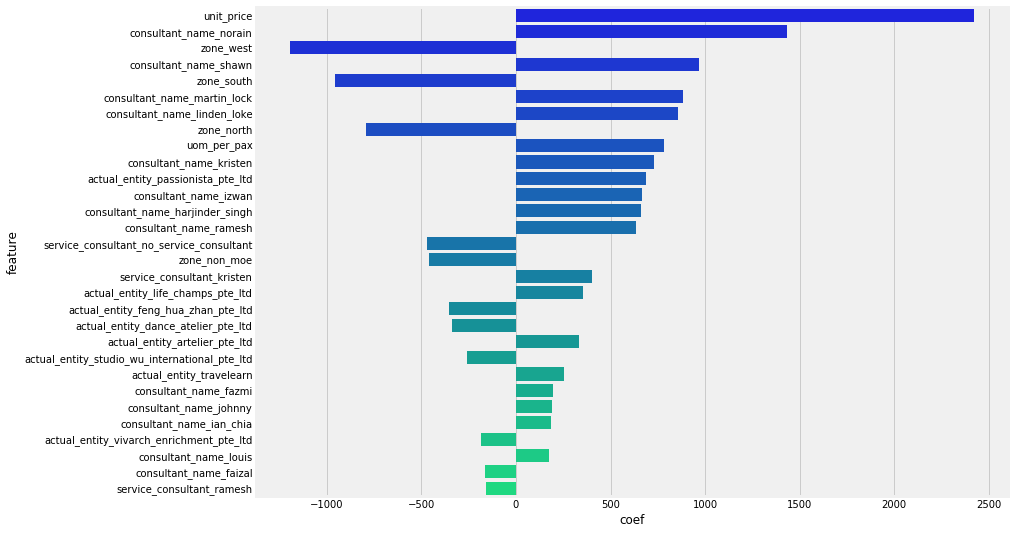

In [187]:
# Visualing Features 

fig = plt.figure(figsize=(12,9))

sns.barplot(y=optimised_ridge_coefs["feature"].head(30), 
            x=optimised_ridge_coefs["coef"].head(30),
            palette="winter")

##### Note:

To repeat, I will discuss insights and inferences at the [Conclusion and Recommendations](#7.1) section.

## 6.2 Modelling for [Objective Two](#objectives) <a id="6.2"></a>

As a reminder, Objective Two was to attempt to create a model to assist in the prediction of a programme's selling price.

All models will have hyperparameters tuned, before scoring is done.

I will discuss insights and inferences at the [Conclusions and Recommendations](#7.2) section.

### 6.2.1 Linear Regression with Ridge Regularisation <a id="6.2.1"></a>

Since it was determined that Ridge Regularisation for Linear Regression returned the best results, I will not run it again. Instead, I will save the metrics into a dataframe, for ease of reference as I run more models. 

Linear Regression with Ridge Regularisation will serve as the baseline for Objective Two.

In [188]:
# Metrics for Ridge Regularisation

obj2_metrics_df = pd.DataFrame(data=[optimised_ridge.score(X_train_sc, y_train), 
                                     optimised_ridge.score(X_val_sc, y_val),
                                     (mean_squared_error(y_true=y_train, y_pred=optimised_ridge.predict(X_train_sc))) ** 0.5,
                                     (mean_squared_error(y_true=y_val, y_pred=optimised_ridge.predict(X_val_sc))) ** 0.5],
                          
                                index=["R\u00b2 Score (Train)", 
                                       "R\u00b2 Score (Validation)",
                                       "RMSE (Train)",
                                       "RMSE (Validation)"], 
                          
                                columns=["Optimised Ridge"])

obj2_metrics_df

,Optimised Ridge
R² Score (Train),0.480780
R² Score (Validation),0.563607
RMSE (Train),3415.504590
RMSE (Validation),3353.866434


### 6.2.2 Decision Tree Regression <a id="6.2.2"></a>

In [189]:
# Instantiating Decision Tree Regressor

dtr = DecisionTreeRegressor(random_state=42)

In [190]:
# GridSearchCV Hyperparameters to try for dtr 

dtr_param_grid = [{"max_depth": [3, 5, 7],
                   "min_samples_split": [5, 10, 15],
                   "min_samples_leaf": [2, 3, 4, 5]}]


In [191]:
# GridSearchCV to find best parameters

optimised_dtr = GridSearchCV(estimator=dtr, 
                             param_grid=dtr_param_grid,
                             cv = 3)

In [192]:
# Fitting Optimised Decision Tree Regressor

optimised_dtr.fit(X_train_sc, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [3, 5, 7],
                          'min_samples_leaf': [2, 3, 4, 5],
                          'min_samples_split': [5, 10, 15]}],
             pre_dispatch='2*n

In [193]:
# Obtaining Best Parameters

optimised_dtr.best_params_

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 15}

In [194]:
# Scoring on train and validation, using Optimised Decision Tree Regressor

print(color.BOLD + "Decision Tree Regressor Train R\u00b2 Score" + color.END, f": {optimised_dtr.score(X_train_sc, y_train)}",
      "\n" +
      color.BOLD + "Decision Tree Regressor Validation R\u00b2 Score" + color.END, f": {optimised_dtr.score(X_val_sc, y_val)}",
      "\n" +
      color.BOLD + "Decision Tree Regressor Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_train, y_pred=optimised_dtr.predict(X_train_sc))) ** 0.5}",
      "\n" +
      color.BOLD + "Decision Tree Regressor Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_val, y_pred=optimised_dtr.predict(X_val_sc))) ** 0.5}")

Decision Tree Regressor Train R² Score : 0.7016130494492709 
Decision Tree Regressor Validation R² Score : 0.5794963568306625 
Decision Tree Regressor Train RMSE Score : 2589.2217945904713 
Decision Tree Regressor Validation RMSE Score : 3292.2432602527565


In [195]:
# Metrics for Optimised Decision Tree Regressor

dtr_metrics_df = pd.DataFrame(data=[optimised_dtr.score(X_train_sc, y_train), 
                                    optimised_dtr.score(X_val_sc, y_val),
                                    (mean_squared_error(y_true=y_train, y_pred=optimised_dtr.predict(X_train_sc))) ** 0.5,
                                    (mean_squared_error(y_true=y_val, y_pred=optimised_dtr.predict(X_val_sc))) ** 0.5],
                          
                              index=["R\u00b2 Score (Train)", 
                                     "R\u00b2 Score (Validation)",
                                     "RMSE (Train)",
                                     "RMSE (Validation)"], 
                          
                              columns=["Decision Tree Regressor"])

obj2_metrics_df = obj2_metrics_df.join(dtr_metrics_df)

obj2_metrics_df

,Optimised Ridge,Decision Tree Regressor
R² Score (Train),0.480780,0.701613
R² Score (Validation),0.563607,0.579496
RMSE (Train),3415.504590,2589.221795
RMSE (Validation),3353.866434,3292.243260


### 6.2.3 Random Forest Regression <a id="6.2.3"></a>

In [196]:
# Instantiating Random Forest Regressor

rfr = RandomForestRegressor(random_state=42)

In [197]:
# GridSearchCV Hyperparameters to try for rfr

rfr_param_grid = {"n_estimators": [50, 100, 150],
                  "max_depth": [7, 9, 11, 13]}

In [198]:
# GridSearchCV to find best parameters

optimised_rfr = GridSearchCV(estimator=rfr, 
                             param_grid=rfr_param_grid,
                             cv = 3)

In [199]:
# Fitting Optimised Random Forest Regressor

optimised_rfr.fit(X_train_sc, y_train)

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [200]:
# Obtaining Best Parameters

optimised_rfr.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [201]:
# Scoring on train and validation using Optimised Random Forest Regressor

print(color.BOLD + "Random Forest Regressor Train R\u00b2 Score" + color.END, f": {optimised_rfr.score(X_train_sc, y_train)}",
      "\n" +
      color.BOLD + "Random Forest Regressor Validation R\u00b2 Score" + color.END, f": {optimised_rfr.score(X_val_sc, y_val)}",
      "\n" +
      color.BOLD + "Random Forest Regressor Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_train, y_pred=optimised_rfr.predict(X_train_sc))) ** 0.5}",
      "\n" +
      color.BOLD + "Random Forest Regressor Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true = y_val, y_pred = optimised_rfr.predict(X_val_sc))) ** 0.5}")

Random Forest Regressor Train R² Score : 0.7987460998551895 
Random Forest Regressor Validation R² Score : 0.666978525076955 
Random Forest Regressor Train RMSE Score : 2126.431972887439 
Random Forest Regressor Validation RMSE Score : 2929.834952956708


In [202]:
# Metrics for Optimised Random Forest Regressor

rfr_metrics_df = pd.DataFrame(data=[optimised_rfr.score(X_train_sc, y_train), 
                                    optimised_rfr.score(X_val_sc, y_val),
                                    (mean_squared_error(y_true=y_train, y_pred=optimised_rfr.predict(X_train_sc))) ** 0.5,
                                    (mean_squared_error(y_true=y_val, y_pred=optimised_rfr.predict(X_val_sc))) ** 0.5],
                          
                              index=["R\u00b2 Score (Train)", 
                                     "R\u00b2 Score (Validation)",
                                     "RMSE (Train)",
                                     "RMSE (Validation)"], 
                          
                              columns=["Random Forest Regressor"])

obj2_metrics_df = obj2_metrics_df.join(rfr_metrics_df)

obj2_metrics_df

,Optimised Ridge,Decision Tree Regressor,Random Forest Regressor
R² Score (Train),0.480780,0.701613,0.798746
R² Score (Validation),0.563607,0.579496,0.666979
RMSE (Train),3415.504590,2589.221795,2126.431973
RMSE (Validation),3353.866434,3292.243260,2929.834953


### 6.2.4 Support Vector Regression <a id="6.2.4"></a>

In [203]:
# Instantiating Support Vector Regressor

svr = SVR()

In [204]:
# GridSearchCV Hyperparameters to try for svr

svr_param_grid = {"gamma":["auto", "scale"] ,
                  "kernel":["linear", "rbf", "poly", "sigmoid"],
                  "C":[0.1, 1, 10, 100, 1000, 10000]}

In [205]:
# GridSearchCV to find best params

optimised_svr = GridSearchCV(estimator=svr, 
                             param_grid=svr_param_grid,
                             cv = 3)

In [206]:
# Fitting Optimised Support Vector Regressor

optimised_svr.fit(X_train_sc, y_train)

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [207]:
# Obtaining Best Parameters

optimised_svr.best_params_

{'C': 10000, 'gamma': 'auto', 'kernel': 'linear'}

In [208]:
# Scoring on train and validation using Optimised Support Vector Regressor

print(color.BOLD + "Support Vector Regressor Train R\u00b2 Score" + color.END, f": {optimised_svr.score(X_train_sc, y_train)}",
      "\n" +
      color.BOLD + "Support Vector Regressor Validation R\u00b2 Score" + color.END, f": {optimised_svr.score(X_val_sc, y_val)}",
      "\n" +
      color.BOLD + "Support Vector Regressor Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_train, y_pred=optimised_svr.predict(X_train_sc))) ** 0.5}",
      "\n" +
      color.BOLD + "Support Vector Regressor Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true = y_val, y_pred = optimised_svr.predict(X_val_sc))) ** 0.5}")

Support Vector Regressor Train R² Score : 0.41142064156361763 
Support Vector Regressor Validation R² Score : 0.48654937696592226 
Support Vector Regressor Train RMSE Score : 3636.485452895016 
Support Vector Regressor Validation RMSE Score : 3637.9470902334047


In [209]:
# Metrics for Optimised Support Vector Regressor

svr_metrics_df = pd.DataFrame(data=[optimised_svr.score(X_train_sc, y_train), 
                                    optimised_svr.score(X_val_sc, y_val),
                                    (mean_squared_error(y_true=y_train, y_pred=optimised_svr.predict(X_train_sc))) ** 0.5,
                                    (mean_squared_error(y_true=y_val, y_pred=optimised_svr.predict(X_val_sc))) ** 0.5],
                          
                              index=["R\u00b2 Score (Train)", 
                                     "R\u00b2 Score (Validation)",
                                     "RMSE (Train)",
                                     "RMSE (Validation)"], 
                          
                              columns=["Support Vector Regressor"])

obj2_metrics_df = obj2_metrics_df.join(svr_metrics_df)

obj2_metrics_df

,Optimised Ridge,Decision Tree Regressor,Random Forest Regressor,Support Vector Regressor
R² Score (Train),0.480780,0.701613,0.798746,0.411421
R² Score (Validation),0.563607,0.579496,0.666979,0.486549
RMSE (Train),3415.504590,2589.221795,2126.431973,3636.485453
RMSE (Validation),3353.866434,3292.243260,2929.834953,3637.947090


### 6.2.5 Adaptive Boosting with Decision Tree Regressors <a id="6.2.5"></a>

In [210]:
# Instantiating Adaptive Boosting with Decision Tree Regressor as Base Estimator

ada_dtr = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42))

In [211]:
# GridSearchCV Hyperparameters to try for ada_dtr

ada_dtr_param_grid = {"n_estimators": [20, 30, 40, 50, 60],
                      "base_estimator__max_depth": [7, 8, 9, 10, 11, 12, 13, 14, 15],
                      "learning_rate": [0.8, 0.9, 1.0]}

In [212]:
# GridSearchCV to find Best Parameters

optimised_ada_dtr = GridSearchCV(estimator=ada_dtr, 
                                 param_grid=ada_dtr_param_grid,
                                 cv = 3)  

In [213]:
# Fitting Optimised Adaptive Boosting with Decision Tree Regressors

optimised_ada_dtr.fit(X_train_sc, y_train)

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                              criterion='mse',
                                                                              max_depth=None,
                                                                              max_features=None,
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                              min_samples_leaf=1,
                                                                              min_samples_split=2,
                                                                              min

In [214]:
# Obtaining Best Parameters

optimised_ada_dtr.best_params_

{'base_estimator__max_depth': 14, 'learning_rate': 1.0, 'n_estimators': 50}

In [215]:
# Scoring on train and validation using Optimised Adaptive Boosting with Decision Tree Regressors

print(color.BOLD + "AdaBoost with Decision Tree Regressors Train R\u00b2 Score" + color.END, f": {optimised_ada_dtr.score(X_train_sc, y_train)}",
      "\n" +
      color.BOLD + "AdaBoost with Decision Tree Regressors Validation R\u00b2 Score" + color.END, f": {optimised_ada_dtr.score(X_val_sc, y_val)}",
      "\n" +
      color.BOLD + "AdaBoost with Decision Tree Regressors Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_train, y_pred=optimised_ada_dtr.predict(X_train_sc))) ** 0.5}",
      "\n" +
      color.BOLD + "AdaBoost with Decision Tree Regressors Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true = y_val, y_pred = optimised_ada_dtr.predict(X_val_sc))) ** 0.5}")

AdaBoost with Decision Tree Regressors Train R² Score : 0.9252964451045291 
AdaBoost with Decision Tree Regressors Validation R² Score : 0.6470731998574755 
AdaBoost with Decision Tree Regressors Train RMSE Score : 1295.5374613884849 
AdaBoost with Decision Tree Regressors Validation RMSE Score : 3016.125129997849


In [216]:
# Metrics for Optimised Adaptive Boosting with Decision Tree Regressors

ada_dtr_metrics_df = pd.DataFrame(data=[optimised_ada_dtr.score(X_train_sc, y_train), 
                                        optimised_ada_dtr.score(X_val_sc, y_val),
                                        (mean_squared_error(y_true=y_train, y_pred=optimised_ada_dtr.predict(X_train_sc))) ** 0.5,
                                        (mean_squared_error(y_true=y_val, y_pred=optimised_ada_dtr.predict(X_val_sc))) ** 0.5],
                          
                                 index=["R\u00b2 Score (Train)", 
                                        "R\u00b2 Score (Validation)",
                                        "RMSE (Train)",
                                        "RMSE (Validation)"], 
                          
                                 columns=["AdaBoost (Decision Tree Regressors)"])

obj2_metrics_df = obj2_metrics_df.join(ada_dtr_metrics_df)

obj2_metrics_df

,Optimised Ridge,Decision Tree Regressor,Random Forest Regressor,Support Vector Regressor,AdaBoost (Decision Tree Regressors)
R² Score (Train),0.480780,0.701613,0.798746,0.411421,0.925296
R² Score (Validation),0.563607,0.579496,0.666979,0.486549,0.647073
RMSE (Train),3415.504590,2589.221795,2126.431973,3636.485453,1295.537461
RMSE (Validation),3353.866434,3292.243260,2929.834953,3637.947090,3016.125130


### 6.2.6 Adaptive Boosting with Random Forest Regressors <a id="6.2.6"></a>

In [217]:
# Instantiating Adaptive Boosting with Random Forest Regressor as Base Estimator

ada_rfr = AdaBoostRegressor(base_estimator=RandomForestRegressor(random_state=42))

In [218]:
# GridSearchCV Hyperparameters to try for ada_rfr

ada_rfr_param_grid = {"n_estimators": [20, 30, 40, 50, 60],
                      "base_estimator__max_depth": [7, 8, 9, 10, 11, 12, 13, 14, 15],
                      "learning_rate": [0.8, 0.9, 1.0]}

In [219]:
# GridSearchCV to find Best Parameters

optimised_ada_rfr = GridSearchCV(estimator=ada_rfr, 
                                 param_grid=ada_rfr_param_grid,
                                 cv = 3) 

In [220]:
# Fitting Optimised Adaptive Boosting with Random Forest Regressors

optimised_ada_rfr.fit(X_train_sc, y_train)

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                                              ccp_alpha=0.0,
                                                                              criterion='mse',
                                                                              max_depth=None,
                                                                              max_features='auto',
                                                                              max_leaf_nodes=None,
                                                                              max_samples=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                              min_samp

In [221]:
# Obtaining Best Parameters

optimised_ada_rfr.best_params_

{'base_estimator__max_depth': 12, 'learning_rate': 0.9, 'n_estimators': 20}

In [222]:
# Scoring on train and validation using Optimised Support Vector Regressor

print(color.BOLD + "AdaBoost with Random Forest Regressors Train R\u00b2 Score" + color.END, f": {optimised_ada_rfr.score(X_train_sc, y_train)}",
      "\n" +
      color.BOLD + "AdaBoost with Random Forest Regressors Validation R\u00b2 Score" + color.END, f": {optimised_ada_rfr.score(X_val_sc, y_val)}",
      "\n" +
      color.BOLD + "AdaBoost with Random Forest Regressors Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_train, y_pred=optimised_ada_rfr.predict(X_train_sc))) ** 0.5}",
      "\n" +
      color.BOLD + "AdaBoost with Random Forest Regressors Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true = y_val, y_pred = optimised_ada_rfr.predict(X_val_sc))) ** 0.5}")

AdaBoost with Random Forest Regressors Train R² Score : 0.9205159150577121 
AdaBoost with Random Forest Regressors Validation R² Score : 0.6542079671402873 
AdaBoost with Random Forest Regressors Train RMSE Score : 1336.3475764255347 
AdaBoost with Random Forest Regressors Validation RMSE Score : 2985.482482431045


In [223]:
# Metrics for Adaptive Boosting with Random Forest Regressors

ada_rfr_metrics_df = pd.DataFrame(data=[optimised_ada_rfr.score(X_train_sc, y_train), 
                                        optimised_ada_rfr.score(X_val_sc, y_val),
                                        (mean_squared_error(y_true=y_train, y_pred=optimised_ada_rfr.predict(X_train_sc))) ** 0.5,
                                        (mean_squared_error(y_true=y_val, y_pred=optimised_ada_rfr.predict(X_val_sc))) ** 0.5],
                          
                                 index=["R\u00b2 Score (Train)", 
                                        "R\u00b2 Score (Validation)",
                                        "RMSE (Train)",
                                        "RMSE (Validation)"], 
                          
                                 columns=["AdaBoost (Random Forest Regressors)"])

obj2_metrics_df = obj2_metrics_df.join(ada_rfr_metrics_df)

obj2_metrics_df

,Optimised Ridge,Decision Tree Regressor,Random Forest Regressor,Support Vector Regressor,AdaBoost (Decision Tree Regressors),AdaBoost (Random Forest Regressors)
R² Score (Train),0.480780,0.701613,0.798746,0.411421,0.925296,0.920516
R² Score (Validation),0.563607,0.579496,0.666979,0.486549,0.647073,0.654208
RMSE (Train),3415.504590,2589.221795,2126.431973,3636.485453,1295.537461,1336.347576
RMSE (Validation),3353.866434,3292.243260,2929.834953,3637.947090,3016.125130,2985.482482


### 6.2.7 Gradient Boosting Regressor <a id="6.2.7"></a>

In [224]:
# Instantiating Gradient Boosting Regressor

gbr = GradientBoostingRegressor(random_state=42)

In [225]:
# GridSearchCV Hyperparameters to try for gbr

gbr_param_grid = {"max_depth": [2, 3, 4],
                  "n_estimators": [100, 125, 150],
                  "learning_rate": [.08, .1, .12]}

In [226]:
# GridSearchCV to find Best Parameters

optimised_gbr = GridSearchCV(estimator=gbr, 
                             param_grid=gbr_param_grid,
                             cv = 3) 

In [227]:
# Fitting Optimised Gradient Boosting Regressor

optimised_gbr.fit(X_train_sc, y_train)

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [228]:
# Obtaining Best Parameters

optimised_gbr.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}

In [229]:
# Scoring on train and validation using Optimised Gradient Boosting Regressor

print(color.BOLD + "Gradient Boosting Regressor Train R\u00b2 Score" + color.END, f": {optimised_gbr.score(X_train_sc, y_train)}",
      "\n" +
      color.BOLD + "Gradient Boosting Regressor Validation R\u00b2 Score" + color.END, f": {optimised_gbr.score(X_val_sc, y_val)}",
      "\n" +
      color.BOLD + "Gradient Boosting Regressor Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_train, y_pred=optimised_gbr.predict(X_train_sc))) ** 0.5}",
      "\n" +
      color.BOLD + "Gradient Boosting Regressor Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true = y_val, y_pred = optimised_gbr.predict(X_val_sc))) ** 0.5}")

Gradient Boosting Regressor Train R² Score : 0.8575890654398204 
Gradient Boosting Regressor Validation R² Score : 0.6667743306712565 
Gradient Boosting Regressor Train RMSE Score : 1788.7556115203008 
Gradient Boosting Regressor Validation RMSE Score : 2930.733039527666


In [230]:
# Metrics for Optimised Gradient Boosting Regressor

gbr_metrics_df = pd.DataFrame(data=[optimised_gbr.score(X_train_sc, y_train), 
                                    optimised_gbr.score(X_val_sc, y_val),
                                    (mean_squared_error(y_true=y_train, y_pred=optimised_gbr.predict(X_train_sc))) ** 0.5,
                                    (mean_squared_error(y_true=y_val, y_pred=optimised_gbr.predict(X_val_sc))) ** 0.5],
                          
                              index=["R\u00b2 Score (Train)", 
                                     "R\u00b2 Score (Validation)",
                                     "RMSE (Train)",
                                     "RMSE (Validation)"], 
                          
                              columns=["Gradient Boosting Regressor"])

obj2_metrics_df = obj2_metrics_df.join(gbr_metrics_df)

obj2_metrics_df

,Optimised Ridge,Decision Tree Regressor,Random Forest Regressor,Support Vector Regressor,AdaBoost (Decision Tree Regressors),AdaBoost (Random Forest Regressors),Gradient Boosting Regressor
R² Score (Train),0.480780,0.701613,0.798746,0.411421,0.925296,0.920516,0.857589
R² Score (Validation),0.563607,0.579496,0.666979,0.486549,0.647073,0.654208,0.666774
RMSE (Train),3415.504590,2589.221795,2126.431973,3636.485453,1295.537461,1336.347576,1788.755612
RMSE (Validation),3353.866434,3292.243260,2929.834953,3637.947090,3016.125130,2985.482482,2930.733040


### 6.2.8 Extreme Gradient Boosting Regressor <a id="6.2.8"></a>

In [231]:
# Instantiating Extreme Gradient Boosting Regressor

xgbr = XGBRegressor(random_state=42)

In [232]:
# GridSearchCV Hyperparameters to try for xgbr

xgbr_param_grid = {"max_depth": [2, 3, 4],
                   "n_estimators": [100, 125, 150],
                   "learning_rate": [.08, .1, .12],
                   "gamma": [0.001, 0.01, 0.1, 1, 10]}

In [233]:
# GridSearchCV to find Best Parameters

optimised_xgbr = GridSearchCV(estimator=xgbr, 
                             param_grid=xgbr_param_grid,
                             cv = 3) 

In [234]:
# Fitting Optimised Extreme Gradient Boosting Regressor

optimised_xgbr.fit(X_train_sc, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None

In [235]:
# Obtaining Best Parameters

optimised_xgbr.best_params_

{'gamma': 0.001, 'learning_rate': 0.12, 'max_depth': 3, 'n_estimators': 150}

In [236]:
# Scoring on train and validation using Optimised Extreme Gradient Boosting Regressor

print(color.BOLD + "Gradient Boosting Regressor Train R\u00b2 Score" + color.END, f": {optimised_xgbr.score(X_train_sc, y_train)}",
      "\n" +
      color.BOLD + "Gradient Boosting Regressor Validation R\u00b2 Score" + color.END, f": {optimised_xgbr.score(X_val_sc, y_val)}",
      "\n" +
      color.BOLD + "Gradient Boosting Regressor Train RMSE Score" + color.END, f": {(mean_squared_error(y_true=y_train, y_pred=optimised_xgbr.predict(X_train_sc))) ** 0.5}",
      "\n" +
      color.BOLD + "Gradient Boosting Regressor Validation RMSE Score" + color.END, f": {(mean_squared_error(y_true = y_val, y_pred = optimised_xgbr.predict(X_val_sc))) ** 0.5}")

Gradient Boosting Regressor Train R² Score : 0.8400169022843307 
Gradient Boosting Regressor Validation R² Score : 0.6707397747535155 
Gradient Boosting Regressor Train RMSE Score : 1895.904213696467 
Gradient Boosting Regressor Validation RMSE Score : 2913.2427299991855


In [237]:
# Metrics for Optimised Extreme Gradient Boosting Regressor

xgbr_metrics_df = pd.DataFrame(data=[optimised_xgbr.score(X_train_sc, y_train), 
                                     optimised_xgbr.score(X_val_sc, y_val),
                                     (mean_squared_error(y_true=y_train, y_pred=optimised_xgbr.predict(X_train_sc))) ** 0.5,
                                     (mean_squared_error(y_true=y_val, y_pred=optimised_xgbr.predict(X_val_sc))) ** 0.5],
                          
                               index=["R\u00b2 Score (Train)", 
                                      "R\u00b2 Score (Validation)",
                                      "RMSE (Train)",
                                      "RMSE (Validation)"], 
                          
                               columns=["Extreme Gradient Boosting Regressor"])

obj2_metrics_df = obj2_metrics_df.join(xgbr_metrics_df)

obj2_metrics_df

,Optimised Ridge,Decision Tree Regressor,Random Forest Regressor,Support Vector Regressor,AdaBoost (Decision Tree Regressors),AdaBoost (Random Forest Regressors),Gradient Boosting Regressor,Extreme Gradient Boosting Regressor
R² Score (Train),0.480780,0.701613,0.798746,0.411421,0.925296,0.920516,0.857589,0.840017
R² Score (Validation),0.563607,0.579496,0.666979,0.486549,0.647073,0.654208,0.666774,0.670740
RMSE (Train),3415.504590,2589.221795,2126.431973,3636.485453,1295.537461,1336.347576,1788.755612,1895.904214
RMSE (Validation),3353.866434,3292.243260,2929.834953,3637.947090,3016.125130,2985.482482,2930.733040,2913.242730


### 6.2.9 Summary of Regression Metrics <a id="6.2.9"></a>

In [238]:
# Transposing for ease of viewing

obj2_metrics_df = obj2_metrics_df.T

obj2_metrics_df

,R² Score (Train),R² Score (Validation),RMSE (Train),RMSE (Validation)
Optimised Ridge,0.480780,0.563607,3415.504590,3353.866434
Decision Tree Regressor,0.701613,0.579496,2589.221795,3292.243260
Random Forest Regressor,0.798746,0.666979,2126.431973,2929.834953
Support Vector Regressor,0.411421,0.486549,3636.485453,3637.947090
AdaBoost (Decision Tree Regressors),0.925296,0.647073,1295.537461,3016.125130
AdaBoost (Random Forest Regressors),0.920516,0.654208,1336.347576,2985.482482
Gradient Boosting Regressor,0.857589,0.666774,1788.755612,2930.733040
Extreme Gradient Boosting Regressor,0.840017,0.670740,1895.904214,2913.242730


Extreme Gradient Boosting returned the lowest **RMSE** on the validation set.

Insights and inferences will be discussed at the [Discussion](#7.2) section.

# 7. Discussion <a id="7"></a>

## 7.1 [Objective One](#6.1) <a id="7.1"></a>

As a reminder, Objective One was to investigate which features helped/harmed `total`. 

For interpretability, Linear Regression was run on the dataset, with regularisation from Ridge, Lasso, and Elastic Net.

**Ridge Regression** performed the best, with the following scores: 
* **Train $R^2$ Score $\approx$ 0.481**
* **Validation $R^2$ Score $\approx$ 0.564** 

The full metrics summary can be found [here](#6.1.5).

<img src ="./images/dsi_13_shaun_capstone_ridge_coef_plot.png" align="left"/>

### 7.1.1 Interpretation and Discussion of Features
The top 5 features that appear to have the greatest impact on `total` are:
* consultant_name_norain
* zone_west
* consultant_name_shawn
* zone_south
* consultant_name_martin_lock

**Note**: `unit_price` will not be discussed, since little insight can be gained from it (generally if you sell something at a high unit price, you get a high total price)

#### <font color = green> Consultants </font>
Out of a total of 20 consultants, the top 5 consultants that appear to positively influence `total` are 
+ Norain
+ Shawn
+ Martin Lock
+ Linden
+ Kristen

These consultants are likely the ones that predominantly sell high-value programmes to schools, which would help explain the relatively positive coefficients attached to them by the model.  

In contrast, consultants such as Faizal seem to negatively affect `total`. It is likely that such consultants:
* Sell programmes of comparatively lower value (Small Value Purchases)
* **Practice Improper Pricing**  

The fact that 3 of the top 5 features are consultants is largely intuitive - consultants directly drive the business. 

#### <font color = green> Zones </font>
Almost all Zones were deemed by the model to have a negative effect on `total`, which is not surprising. Zones represent the totality of sold programmes within a particular cluster of educational institutions. This is inclusive of both high-value programmes, and SVPs. 

SVPs make up the bulk of sales in terms of quantity, which may explain why `Zones` were determined by the model to negatively affect sale price. 

#### <font color = green> Business Entity </font>
Out of a total of 17 business entities, the top 3 entities that appear to positively influence `total` are:
* Passionista
* Life Champs
* Artelier

These entities are likely the ones that are bringing in the most profit for the company, and could be due to a variety of reasons:
* Nature of programmes sold are high-value programmes 
* Higher demand for programmes under these entities

In contrast, business entities such as Feng Hua Zhan and Dance Atelier appear to negatively influence `total`. Possible reasons for this are:
* Nature of programmes sold are low-value programmes (SVPs) 
* Lower demand for programmes under these entities
* **Improper pricing** 

`actual_entity_passionista_pte_ltd` stands out significantly from the other business entities under the company, and with good reason. There are programmes under the Ministry of Education (MOE), called Elective Modules (EM), which often fetch exceptionally high prices due to the amount of budget allocated to it by schools. Passionista Pte Ltd is an entity that tends to sell the majority of EMs for the company. 

A special mention can be made for Life Champs, which is the second business unit that positively influences `total`. Life Champs tends to sell programmes that span long durations, sometimes up to an entire year. Naturally, it emerges as a highly influential feature, since such programmes also sell for a high value. 


#### <font color = green> Unit of Measure </font>
Worth mentioning, is `uom_per_pax`, referring to the "per pax" unit of measurement when selling a programme (the alternative uom is "per hour"). 

Evidently, the more favourable UOM for `total` is "per pax". This makes sense, because it is easier to package augmented products or value-added services under "per pax" pricing, as compared to "per hour" pricing, which tends to prioritise core products.    


### 7.1.2 Business Implications
#### <font color = green> Per Pax as Choice of UOM </font>
While UOM may sometimes be determined by schools, consultants can still attempt to influence the choice of UOM by the school. 

The model has determined that `uom_per_pax` is the top feature that positively affects `total`. In addition to that, it was earlier explained that this pricing method affords the packaging of value added services, which can be a source of additional revenue for the company. 

As far as possible, the company should make concerted efforts to push for "Per Pax" as the choice of pricing method.

#### <font color = green> Invest in Lagging Business Entities </font>
In general, so long as any business entity sells a programme, it has made a profit. 

However, the company may find it worthwhile to explore how seemingly "lagging" business entities like Feng Hua Zhan and Dance Atelier may attempt to sell higher-value programmes, instead of focusing on already "high-performing" entities. This has long run benfits for these business entities.

Once a business entity has secured a greater revenue stream, then more resources are available for innovation, and other business development related endeavours. Therefore, **if we consider the long term**, there may be more benefit to invest in trailing business entities, as oppossed to continued investment in high-performing entities.   

#### <font color = green> Align Pricing Strategies </font>
It may be complicated to prescribe a method of sales for all consulants. Some may opt to prioritise a handful of high-value projects, while others may priortise SVPs which tend to be numerous. 

Consultant Shawn and Norain tend to favour high-value programmes, while consultant Martin Lock tends to secure as many SVPs as possible. All 3 consultants are the top performers in the company. 

However, what can potentially be reviewed is the pricing strategy adopted by each consultant. While they must be given the autonomy to price as they deem fit, all consultants should ultimately align their pricing strategy with that of the company. 

## 7.2 [Objective Two](#6.2) <a id="7.2"></a>

As a reminder, Objective Two was to attempt to create a model to assist in the prediction of a programme's selling price.

Several Regression models were run, with Extreme Gradient Boosting emerging as the best model with the following scores: 
* **Train RMSE Score $\approx$ 1895.90**
* **Validation RMSE Score $\approx$ 2913.24** 

The full metrics summary can be found [here](#6.2.9).

### 7.1.1 Interpretation and Discussion of Model

The **RMSE** of **2913.24** suggests that the predicted selling price of a programme can be off by some **SGD 2913.24**, which is likely to be unacceptable.

This is particularly so for SVPs, as certain lower-value programmes sell for much lower than the RMSE itself. This implies that the XBGRegressor model may have limited utility in terms of predicting a suitable selling price for a programme.    

### 7.1.2 Business Implications

As best, this model should serve as a modest guide for higher-value programmes. 

# 8. Limitations <a id="8"></a>

## 8.1 Small Dataset <a id="8.1"></a>

Perhaps the biggest limitation of the project was the small dataset. 

After preprocessing, there were about 45 features for a total of 675 observations, which may not have been optimal for Machine Learning. 

One way to circumvent this is to obtain sales data for more years. This project utilised only two year worth of sales data, which likely resulted in poor machine learning. 

## 8.2 Limited Hyperparameter Tuning <a id="8.2"></a>

Due to memory constraints, it was not feasible to gridsearch an exhaustive list of hyperparameters to produce the best model to train on. 

# 9. Future Directions <a id="9"></a>

### <font color = green> Small Dataset </font>

To address the issue of a small dataset, sales data for more years can be utilised to train the model. This project only utilised 2 years, 2018 and 2019. 

### <font color = green> Limited Hyperparameter Tuning </font>

To address the issue of limited hyperparameter tuning due to memory constraints, Amazon Web Services (AWS) can be considered.

### <font color = green> Differentiating UOM </font>

With regard to creating a model to predict selling price, future studies may find it worthwhile to first separate the dataset based on `UOM`. 

Based on domain knowldege, the majority of `per_pax` tend to result in significantly higher selling prices as compared to `per_hr`, which may have caused some difficulty for machine learning. 

Additionally, this distinction could result in a more targetted model to help predict a suitable selling price for a programme, based on whether the UOM is `per_pax` or `per_hr`. 

### <font color = green> Include Cost in Place of Qty and/or Unit Price </font>

Since consultants tend to adopt different pricing strategies, and different business entities sell different value programmes, it may be worth including cost-related features as part of the dataset.

This eliminates the variation between business units and consultants, hopefully allowing the model to determine that some entities and/or consultants tend to sell higher than others despite similar cost-features.  

In [239]:
print(f"Run complete, total time taken \u2248 {time.time()-t0:.2f}s")

Run complete, total time taken ≈ 1775.31s
